#### Introduction

In [1]:
import pandas as pd
import numpy as np
import zipfile
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from scipy.stats import chi2_contingency
import plotly.graph_objects as go
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
import math
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN
from sklearn.model_selection import train_test_split
from IPython.display import display, HTML
import matplotlib.ticker as ticker
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from scipy.spatial.distance import cdist
from sklearn.metrics import pairwise_distances

In [2]:
zip_path = '../00_Data_Bases/Supermercado_onehot.zip' 
csv_filename = 'Supermercado_onehot.csv'

with zipfile.ZipFile(zip_path, 'r') as z:
    with z.open(csv_filename) as f:
        df = pd.read_csv(f)

In [3]:
display(HTML(df.to_html(max_rows=5, max_cols=200, notebook=True)))

In [4]:
df = df.drop('department_id', axis=1)

In [5]:
column_names = ['order_id', 'user_id', 'order_number', 'order_dow', 'order_hour_of_day', 
                'days_since_prior_order', 'product_id', 'add_to_cart_order', 'reordered', 
                'max_order', 'order_number_group_21-40 order', 'order_number_group_41-60 order',
                'order_number_group_61-80 order', 'order_number_group_81-100 order', 
                'day_Monday', 'day_Saturday', 'day_Sunday', 'day_Thursday', 'day_Tuesday', 
                'day_Wednesday', 'order_time_list_Dawn', 'order_time_list_Morning', 
                'order_time_list_Night', 'department_babies', 'department_bakery', 
                'department_beverages', 'department_breakfast', 'department_bulk', 
                'department_canned goods', 'department_dairy eggs', 'department_deli', 
                'department_dry goods pasta', 'department_frozen', 'department_household', 
                'department_international', 'department_meat seafood', 'department_missing', 
                'department_other', 'department_pantry', 'department_personal care', 
                'department_pets', 'department_produce', 'department_snacks', 
                'product_name_asian foods', 'product_name_baby accessories', 
                'product_name_baby bath body care', 'product_name_baby food formula', 
                'product_name_bakery desserts', 'product_name_baking ingredients', 
                'product_name_baking supplies decor', 'product_name_beauty']

department_columns = [col for col in column_names if col.startswith('department')]

print(department_columns)

['department_babies', 'department_bakery', 'department_beverages', 'department_breakfast', 'department_bulk', 'department_canned goods', 'department_dairy eggs', 'department_deli', 'department_dry goods pasta', 'department_frozen', 'department_household', 'department_international', 'department_meat seafood', 'department_missing', 'department_other', 'department_pantry', 'department_personal care', 'department_pets', 'department_produce', 'department_snacks']


### Clustering - K-Means

c:\Users\marti\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\marti\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\marti\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\marti\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

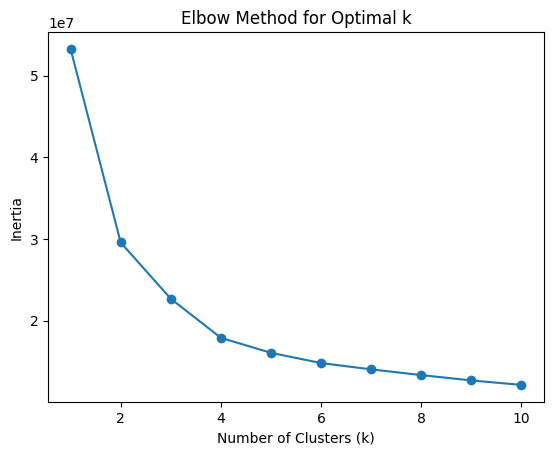

In [6]:
X = df[['department_babies', 'department_bakery', 'department_beverages', 'department_breakfast', 'department_bulk', 
        'department_canned goods', 'department_dairy eggs', 'department_deli', 
        'department_dry goods pasta', 'department_frozen', 'department_household', 
        'department_international', 'department_meat seafood', 'department_missing', 
        'department_other', 'department_pantry', 'department_personal care', 
        'department_pets', 'department_produce', 'department_snacks', 'max_order', 'order_hour_of_day', 'days_since_prior_order']]

inertia_values = []

for n_clusters in range(1, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=100)
    kmeans.fit(X)
    inertia_values.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia_values, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

### Clustering - K-Means - n=2

c:\Users\marti\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


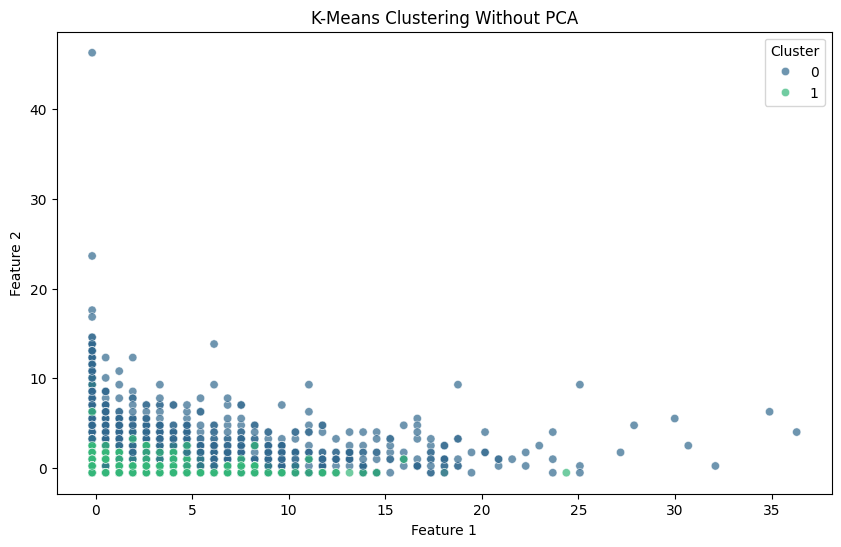

In [7]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

n_clusters = 2

kmeans2 = KMeans(n_clusters=n_clusters, random_state=100)
labels = kmeans2.fit_predict(X_scaled)

df_c2 = pd.DataFrame(X_scaled, columns=[f'Feature_{i+1}' for i in range(X.shape[1])])
df_c2['Cluster'] = labels

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Feature_1', y='Feature_2', hue='Cluster', data=df_c2, palette='viridis', alpha=0.7)
plt.title('K-Means Clustering Without PCA')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(title='Cluster')
plt.show()

In [8]:
df_l2 = df[['department_babies', 'department_bakery', 'department_beverages', 'department_breakfast', 'department_bulk', 
        'department_canned goods', 'department_dairy eggs', 'department_deli', 
        'department_dry goods pasta', 'department_frozen', 'department_household', 
        'department_international', 'department_meat seafood', 'department_missing', 
        'department_other', 'department_pantry', 'department_personal care', 
        'department_pets', 'department_produce', 'department_snacks', 'max_order', 'order_hour_of_day', 'days_since_prior_order']]

In [9]:
df_l2['Clusters_2'] = kmeans2.labels_

C:\Users\marti\AppData\Local\Temp\ipykernel_33240\1870083769.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_l2['Clusters_2'] = kmeans2.labels_


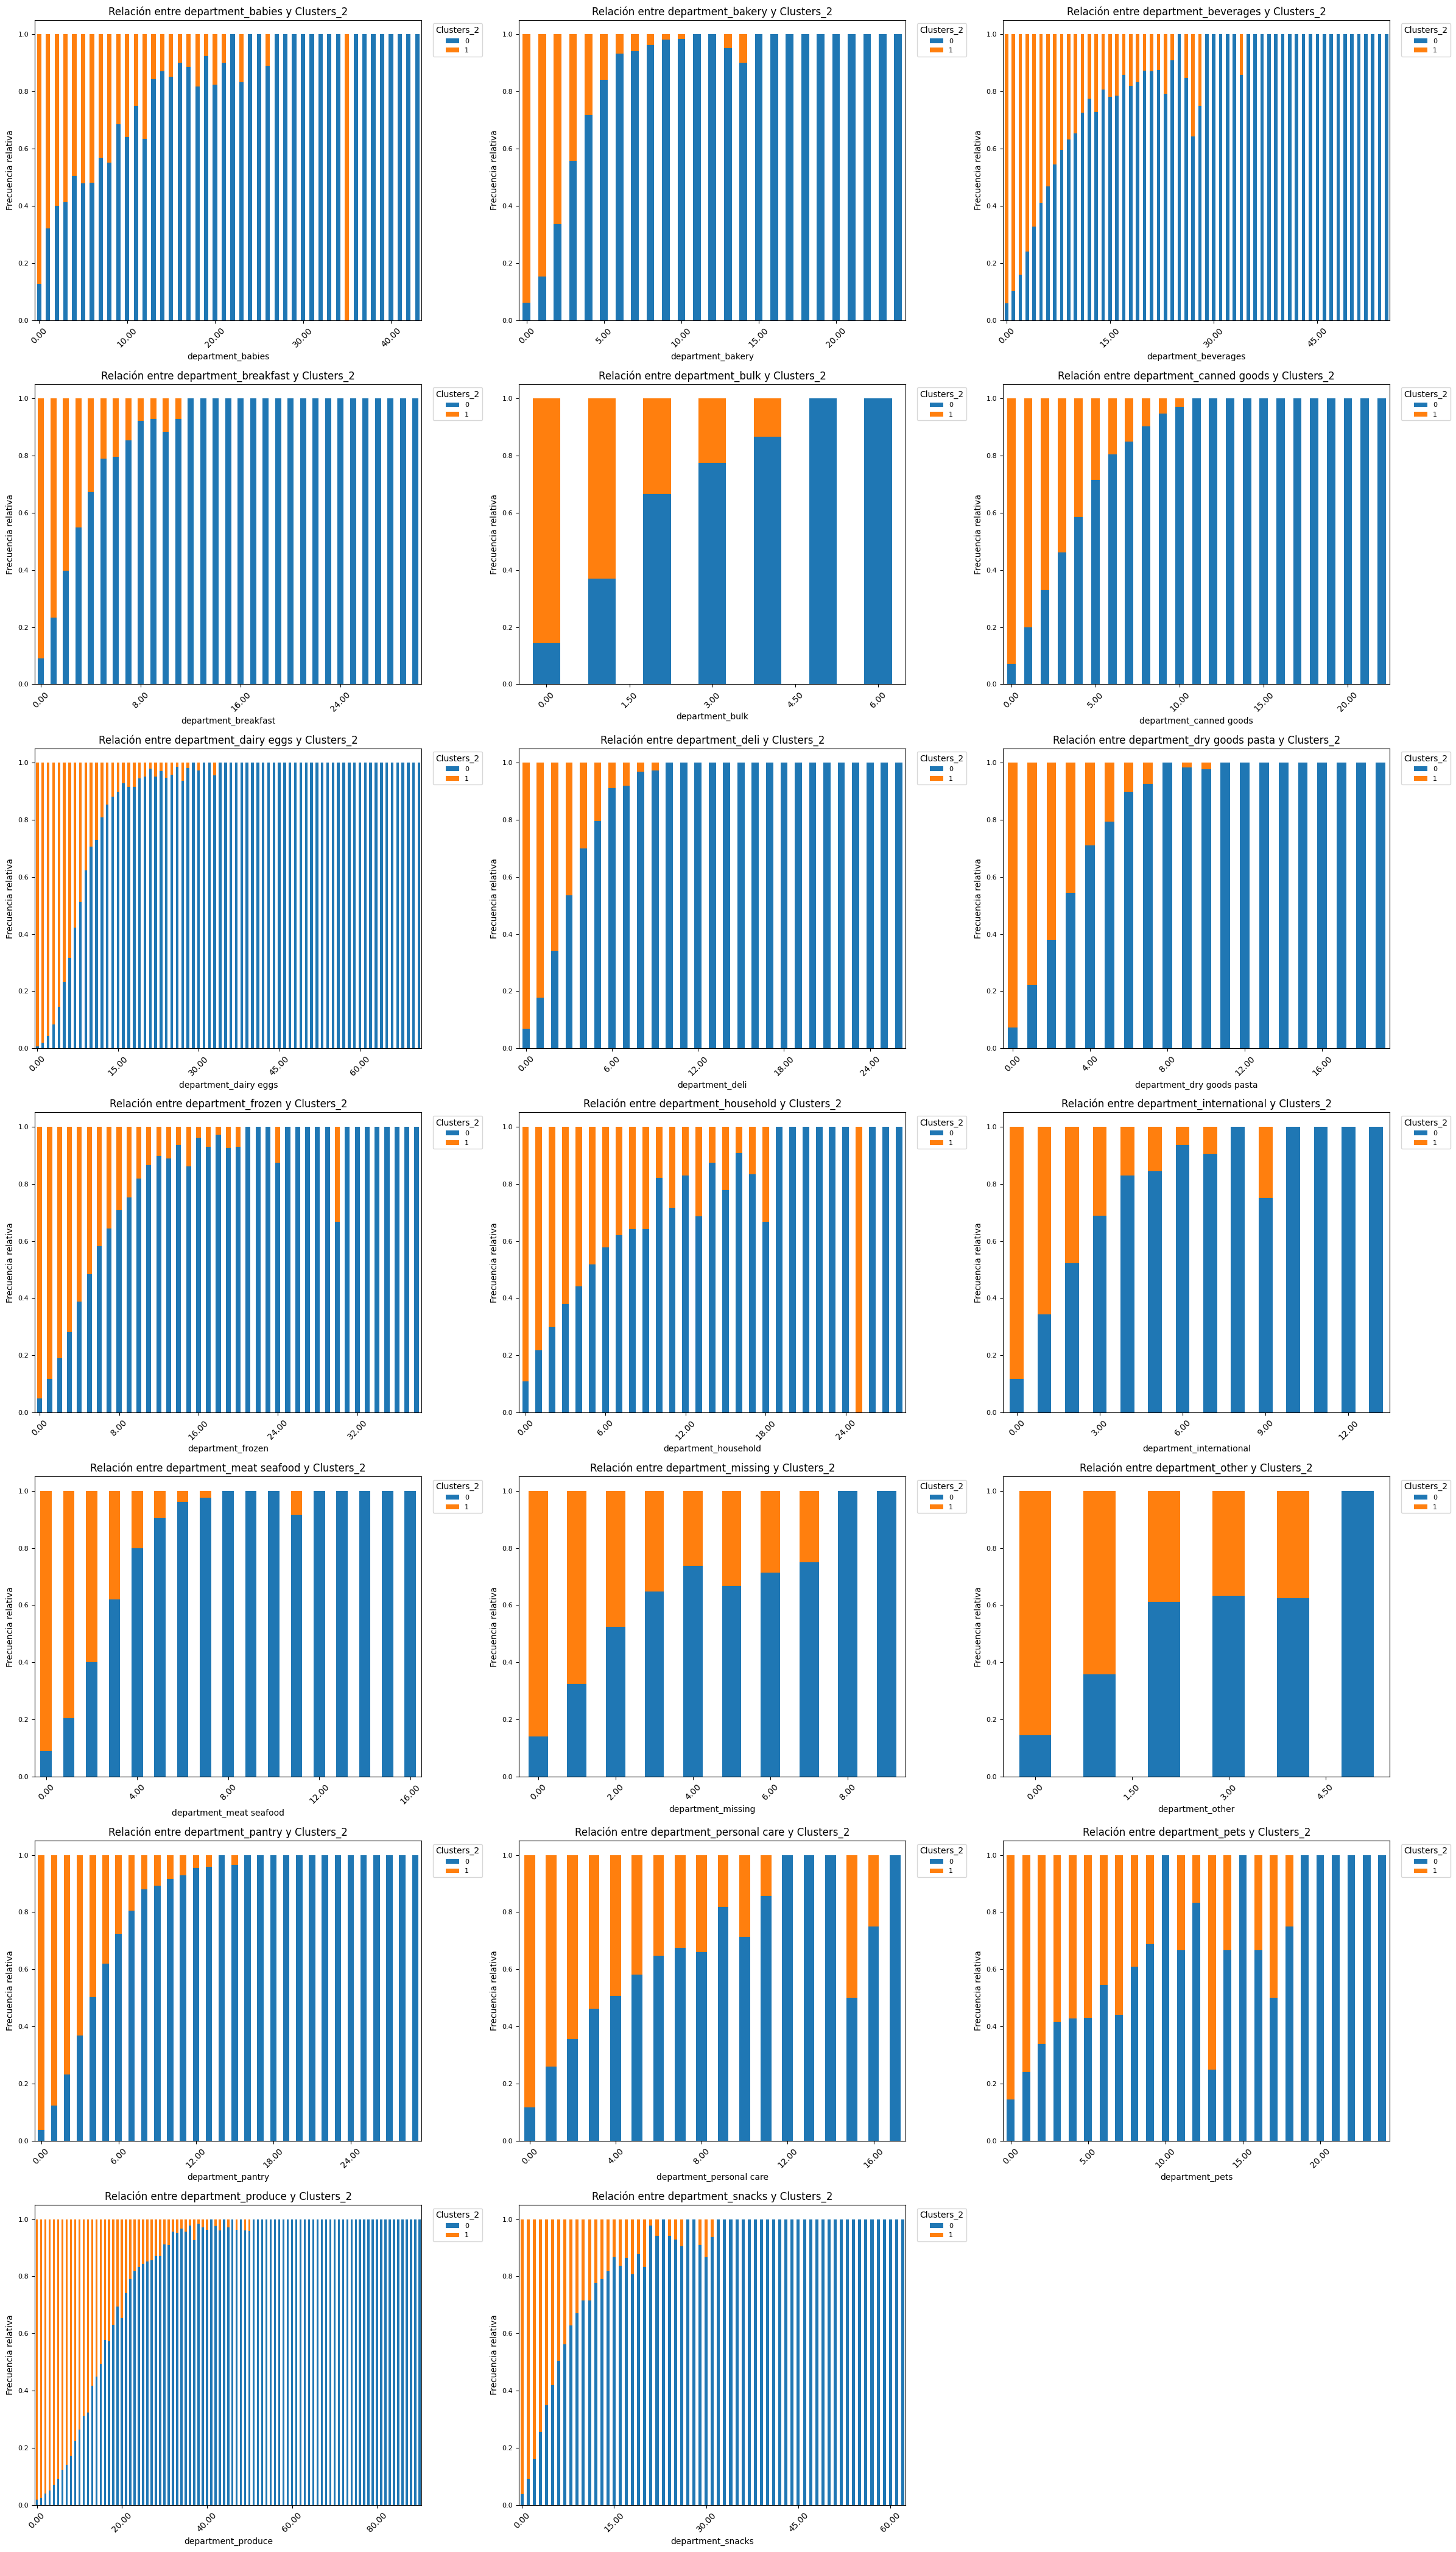

In [10]:
department_columns = [col for col in df_l2.columns if col.startswith('department')]

num_rows = 7
num_cols = 3

fig, axs = plt.subplots(num_rows, num_cols, figsize=(8 * num_cols, 6 * num_rows))

for i, columna in enumerate(department_columns):
    if i >= num_rows * num_cols:
        break
    
    row = i // num_cols
    col = i % num_cols

    frecuencias = df_l2.groupby(columna)['Clusters_2'].value_counts(normalize=True).unstack()
    frecuencias.plot(kind='bar', stacked=True, ax=axs[row, col])
    
    axs[row, col].set_title(f'Relación entre {columna} y Clusters_2', fontsize=12)
    axs[row, col].set_xlabel(columna, fontsize=10)
    axs[row, col].set_ylabel('Frecuencia relativa', fontsize=10)
    axs[row, col].tick_params(axis='x', rotation=45, labelsize=10)
    axs[row, col].tick_params(axis='y', labelsize=8)

    axs[row, col].legend(title='Clusters_2', fontsize=8, bbox_to_anchor=(1.02, 1), loc='upper left')
    
    axs[row, col].xaxis.set_major_locator(ticker.MaxNLocator(5))
    axs[row, col].xaxis.set_major_formatter(ticker.FormatStrFormatter('%.2f'))

for j in range(i + 1, num_rows * num_cols):
    fig.delaxes(axs[j // num_cols, j % num_cols])

plt.tight_layout()
plt.show()


In [11]:
stats = df_l2.groupby('Clusters_2').agg(['mean', 'median'])

mode_df = df_l2.groupby('Clusters_2').agg(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan)
mode_df.columns = pd.MultiIndex.from_product([mode_df.columns, ['mode']])

stats = pd.concat([stats, mode_df], axis=1)

stats_formatted = stats.style.format("{:.2f}").set_caption("Estadísticas Descriptivas por Clúster").set_properties(**{
    'text-align': 'center'}).set_table_styles([{
    'selector': 'caption',
    'props': 'caption-side: top; font-size:16px; font-weight:bold; text-align:center;'
}])

stats_formatted

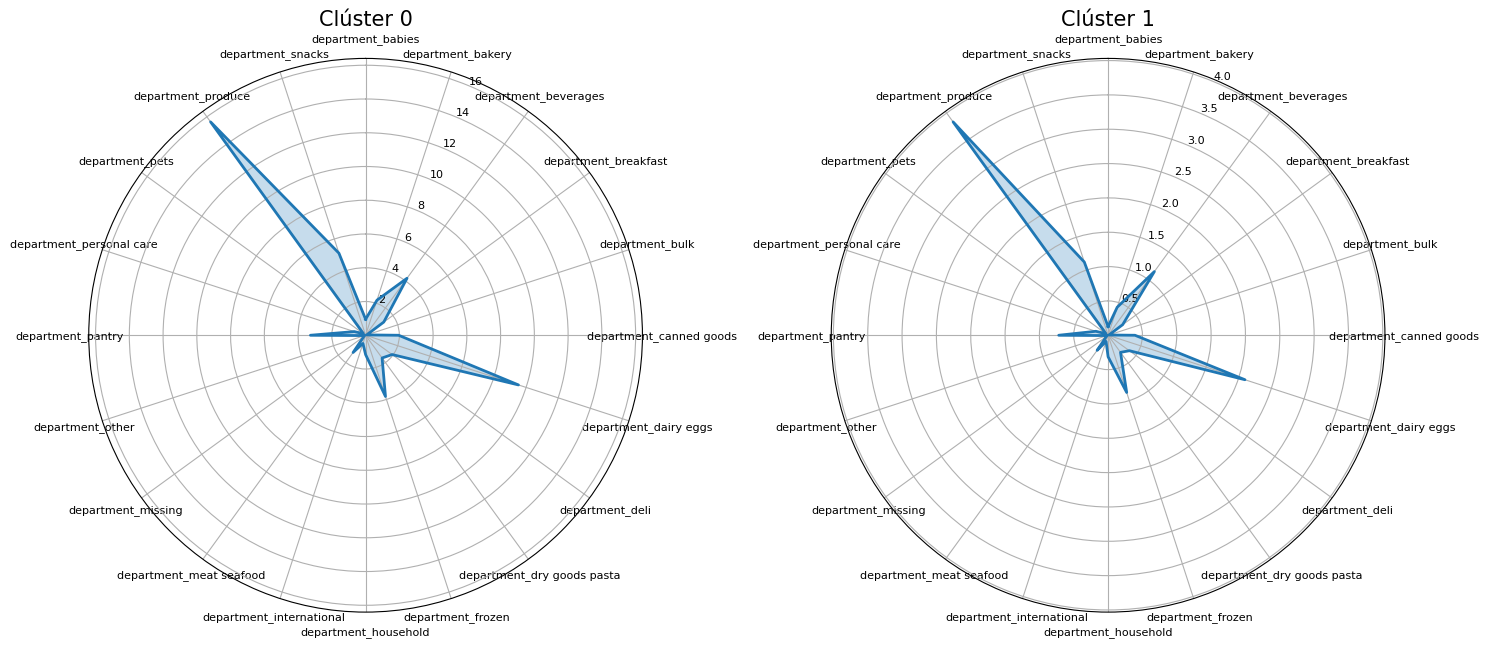

In [12]:
num_clusters = df_l2['Clusters_2'].nunique()
categories = department_columns

fig, axes = plt.subplots(1, num_clusters, subplot_kw={'polar': True}, figsize=(15, 7))

for i, cluster in enumerate(df_l2['Clusters_2'].unique()):
    values = df_l2[df_l2['Clusters_2'] == cluster][categories].mean().values.flatten().tolist()
    values += values[:1]  # Cerrar el gráfico de radar
    angles = np.linspace(0, 2 * np.pi, len(categories), endpoint=False).tolist()
    angles += angles[:1]
    
    ax = axes[i] if num_clusters > 1 else axes
    ax.set_theta_offset(np.pi / 2)
    ax.set_theta_direction(-1)
    
    ax.plot(angles, values, linewidth=2, linestyle='solid')
    ax.fill(angles, values, alpha=0.25)
    ax.set_title(f'Clúster {cluster}', size=15)
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories, fontsize=8)
    ax.tick_params(axis='y', labelsize=8)

plt.tight_layout()
plt.show()

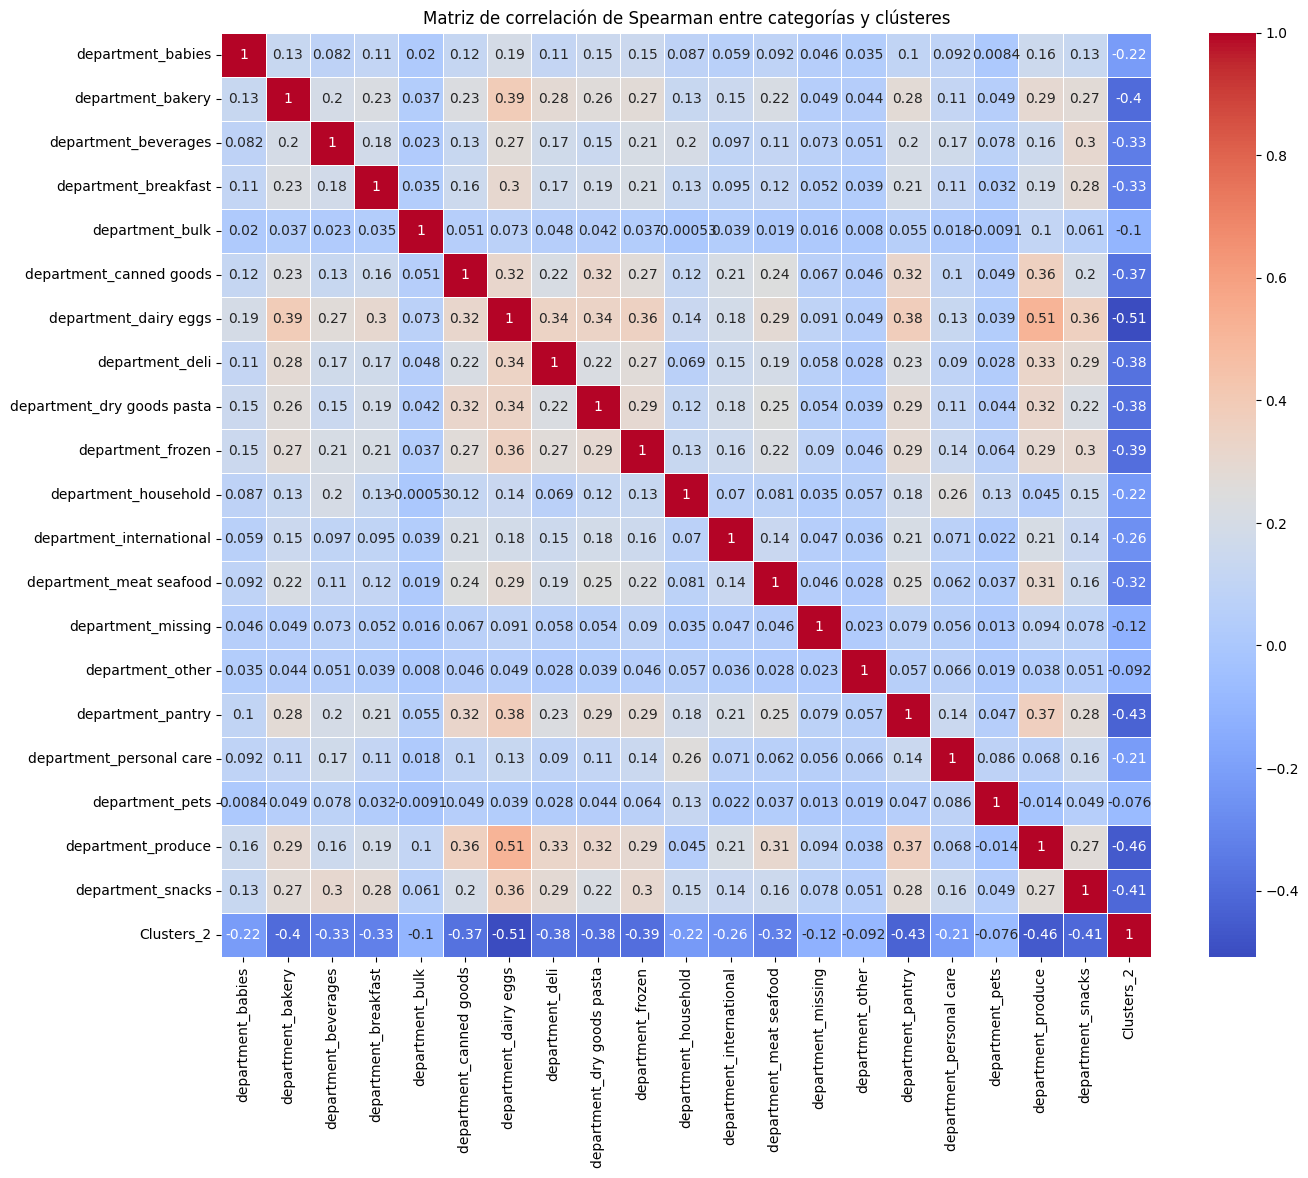

In [13]:
correlations = df_l2[department_columns + ['Clusters_2']].corr(method='spearman')

plt.figure(figsize=(15, 12))
sns.heatmap(correlations, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de correlación de Spearman entre categorías y clústeres')
plt.show()

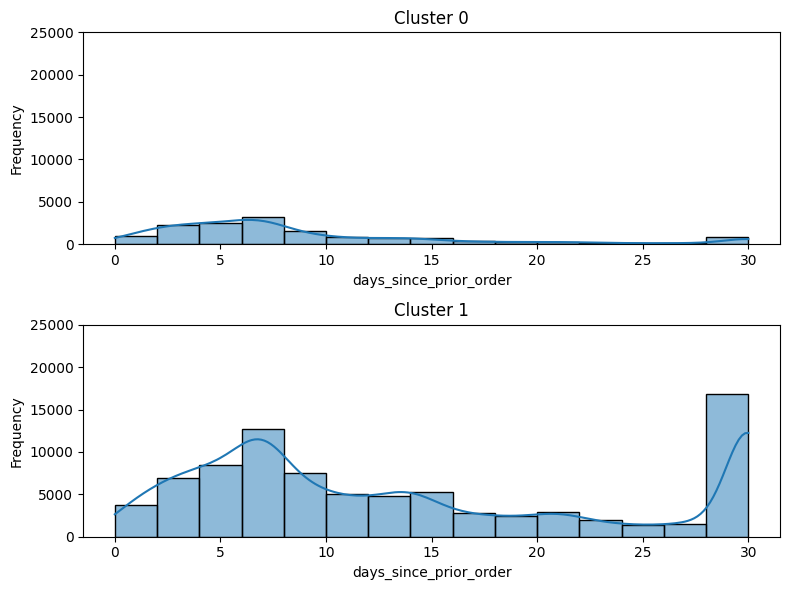

In [14]:
clusters_2 = df_l2['Clusters_2'].unique()
n_clusters = len(clusters_2)

n_cols = 1
n_rows = math.ceil(n_clusters / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(8, 6))

if n_rows == 1:
    axes = [axes]

max_y = 25000
for cluster in clusters_2:
    max_y = max(max_y, df_l2[df_l2['Clusters_2'] == cluster]['days_since_prior_order'].value_counts().max())

for i, cluster in enumerate(clusters_2):
    sns.histplot(df_l2[df_l2['Clusters_2'] == cluster]['days_since_prior_order'], kde=True, bins=15, ax=axes[i])
    axes[i].set_title(f'Cluster {cluster}')
    axes[i].set_xlabel('days_since_prior_order')
    axes[i].set_ylabel('Frequency')
    axes[i].set_ylim(0, max_y)

plt.tight_layout()
plt.show()


#### Análisis Crítico de la Clusterización de Dos Clústeres

El análisis previo se basó en la segmentación de clientes en dos clústeres, describiendo sus diferencias y proponiendo estrategias específicas. Sin embargo, tras un examen más detallado, se determinó que esta clusterización puede no ser adecuada debido a varias limitaciones observadas.

##### 1. Patrones en la Variable days_since_prior_order
El Cluster 0 tiene un comportamiento más regular, con un pico fuerte en los 4-7 días desde el pedido anterior, y otro pico en 30 días.
El Cluster 1 tiene un patrón más distribuido, con una mayor frecuencia en compras alrededor de los 30 días.
Sin embargo, ambos clústers comparten picos significativos en días similares (particularmente en el día 30), lo que sugiere una superposición en los hábitos de compra, limitando la efectividad para diferenciar hábitos únicos.


##### 2. Preferencias por departamentos:

Se observa que la clusterización aplicada presenta una distribución desigual, ya que en la mayoría de departamentos se ve dominancia del Cluster 0.

#### Número Insuficiente de Clústeres
Dividir a los clientes en solo dos clústeres puede ser demasiado simplista para encontrar patrones de comportamiento de los consumidores.

Se infiere que un mayor número de clústeres puede permitir una segmentación más granular que refleje diferencias relevantes en variables como:
Frecuencia de compra.
Diversificación en diferentes departamentos.
Volumen promedio por pedido.

### Clustering - K-Means - n=3

c:\Users\marti\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


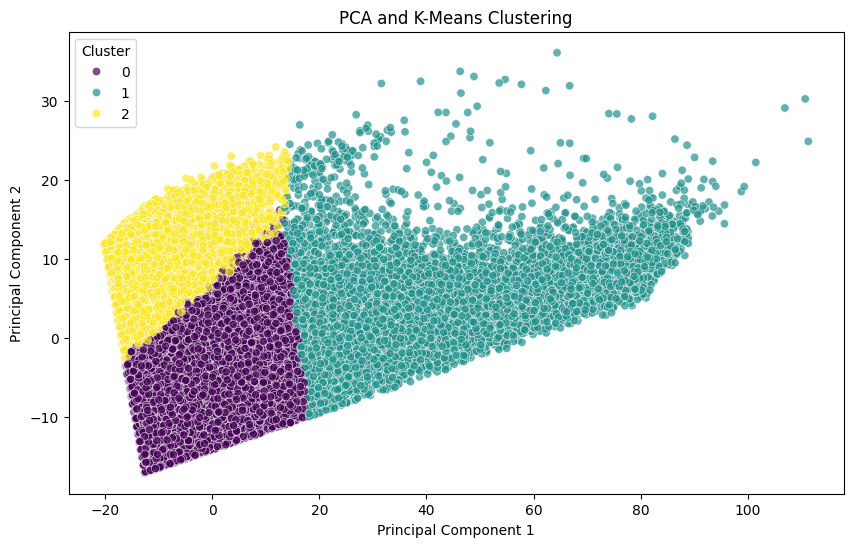

In [15]:
n_clusters = 3

kmeans3 = KMeans(n_clusters=n_clusters, random_state=100)
labels = kmeans3.fit_predict(X)

pca = PCA(n_components=2)
principal_components = pca.fit_transform(X)

df_c3 = pd.DataFrame(principal_components, columns=['PC1', 'PC2'])
df_c3['Cluster'] = labels

plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=df_c3, palette='viridis', alpha=0.7)
plt.title('PCA and K-Means Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

In [16]:
df_l3 = df[['department_babies', 'department_bakery', 'department_beverages', 'department_breakfast', 'department_bulk', 
        'department_canned goods', 'department_dairy eggs', 'department_deli', 
        'department_dry goods pasta', 'department_frozen', 'department_household', 
        'department_international', 'department_meat seafood', 'department_missing', 
        'department_other', 'department_pantry', 'department_personal care', 
        'department_pets', 'department_produce', 'department_snacks', 'max_order', 'order_hour_of_day', 'days_since_prior_order']]

In [17]:
df_l3['Clusters_3'] = kmeans3.labels_

C:\Users\marti\AppData\Local\Temp\ipykernel_33240\2088080857.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_l3['Clusters_3'] = kmeans3.labels_


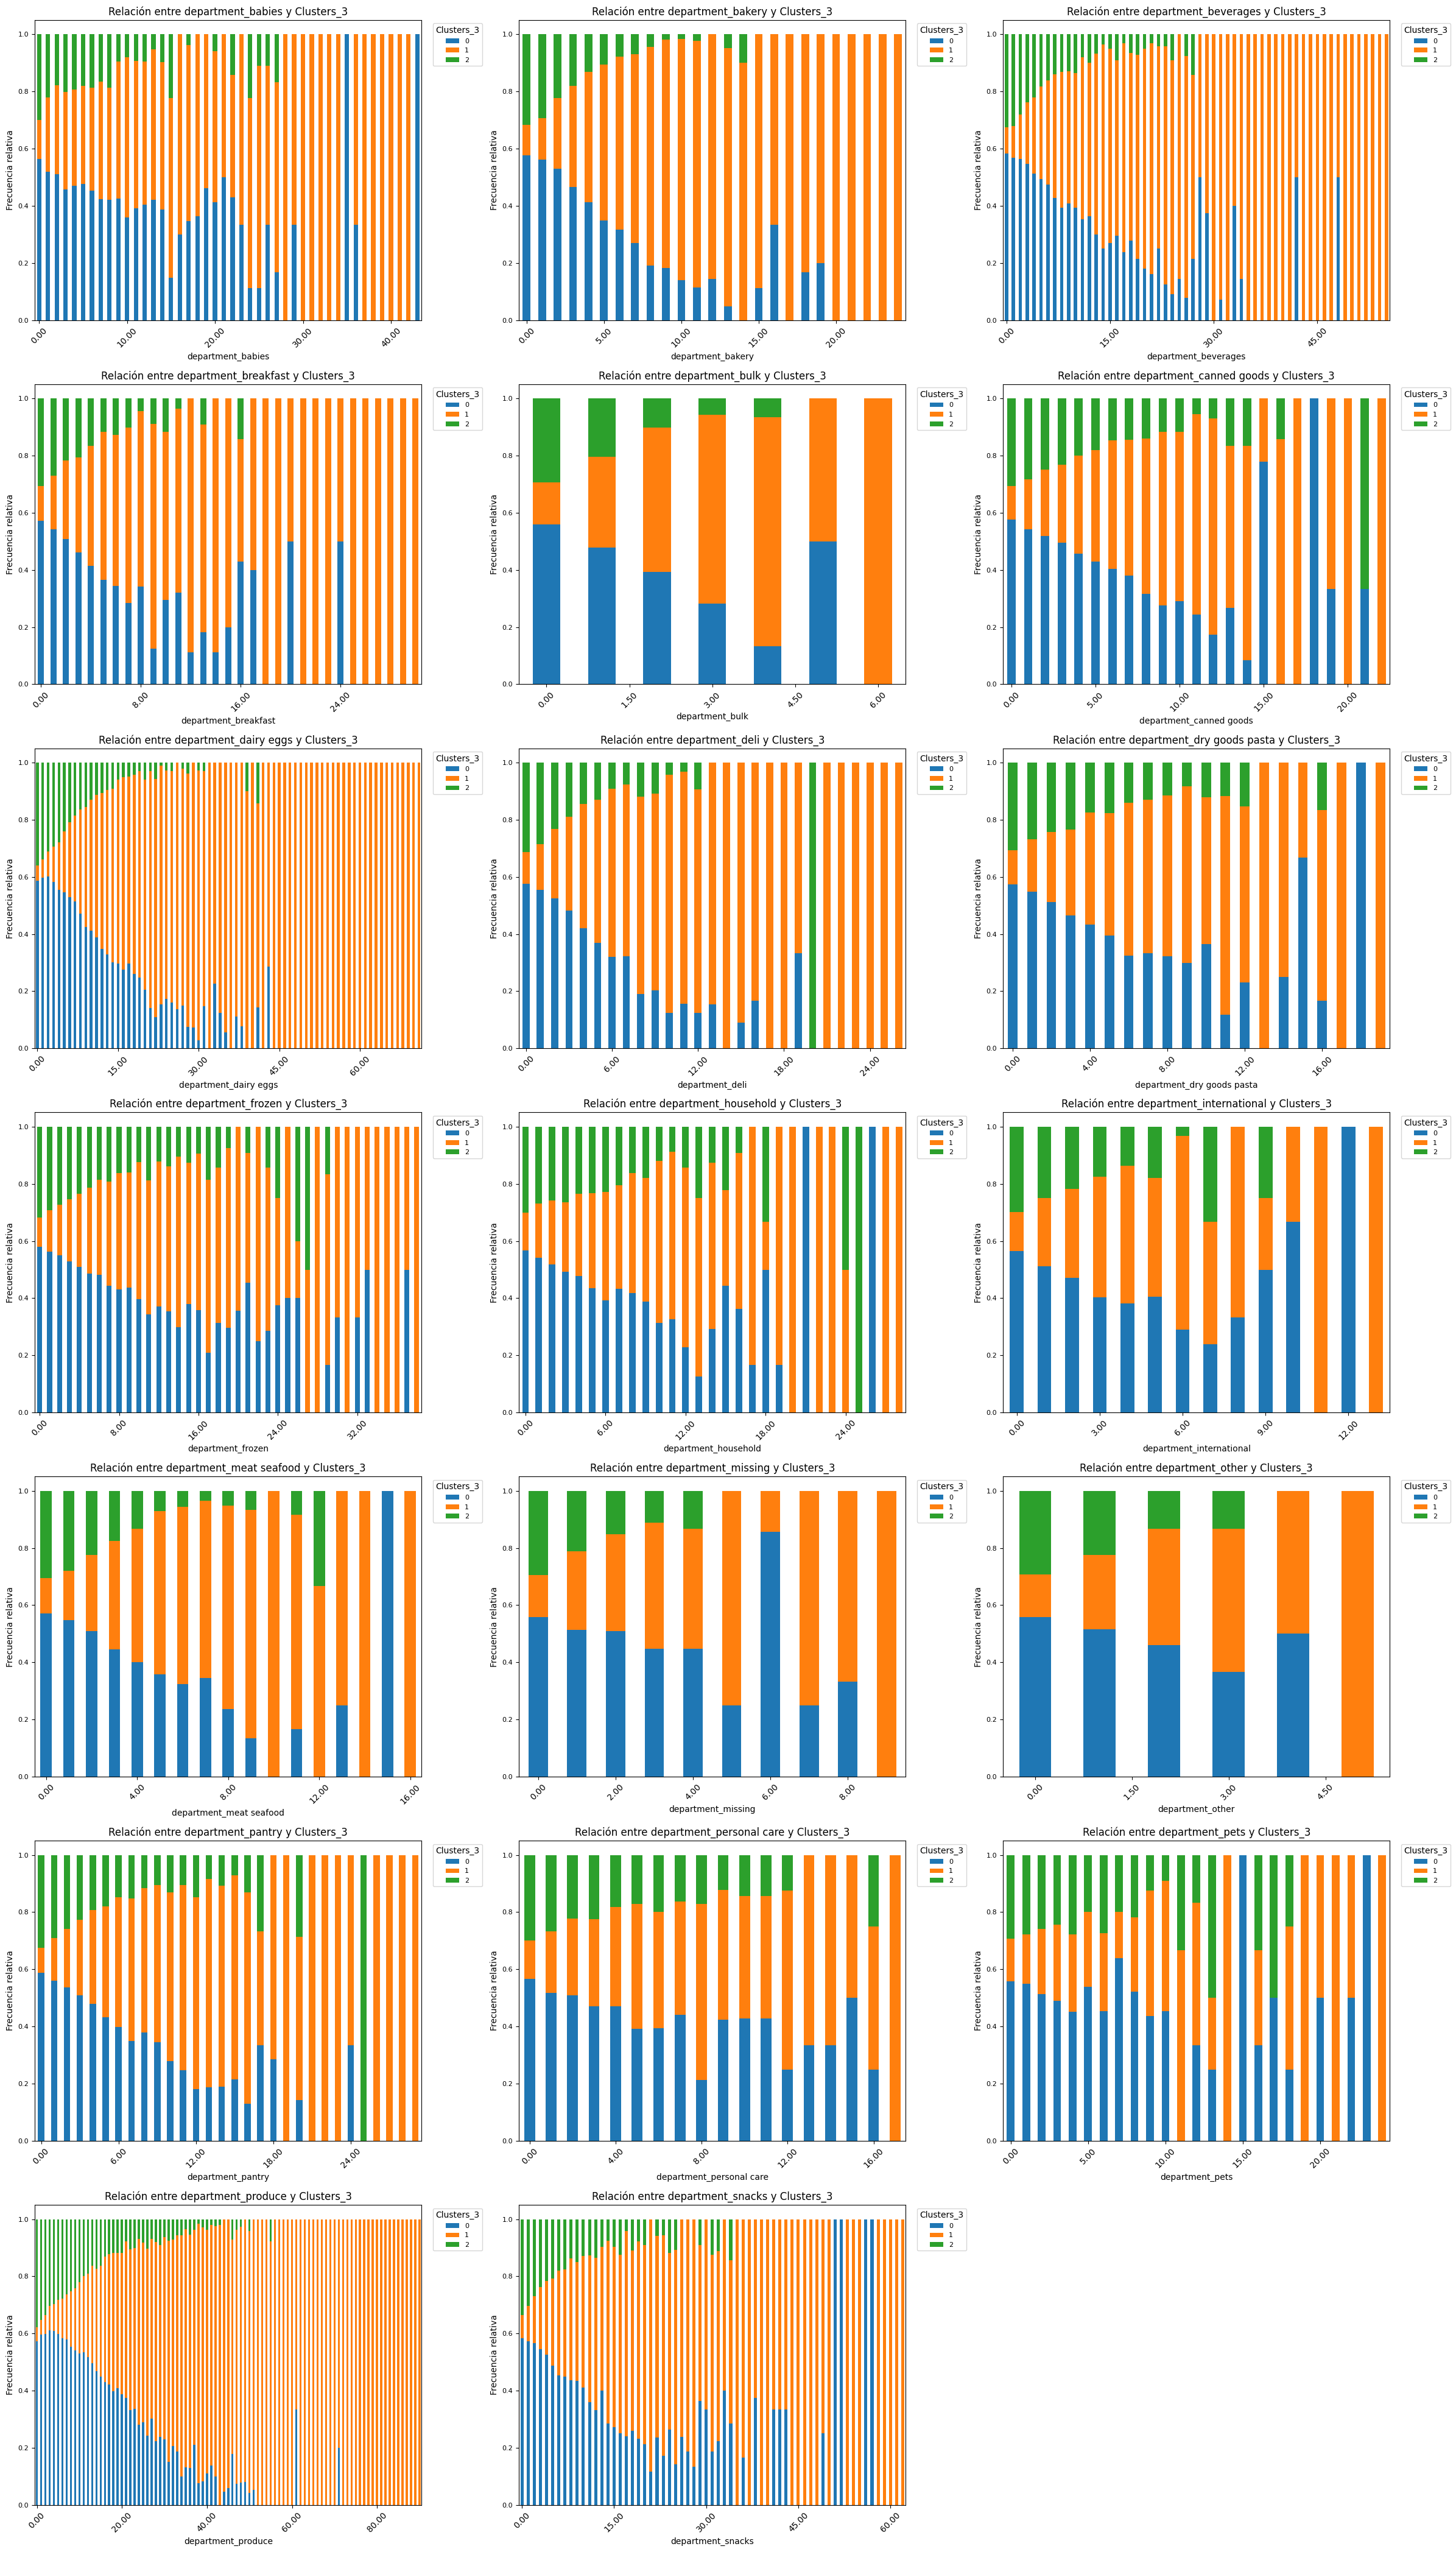

In [18]:
department_columns = [col for col in df_l3.columns if col.startswith('department')]

num_rows = 7
num_cols = 3

fig, axs = plt.subplots(num_rows, num_cols, figsize=(8 * num_cols, 6 * num_rows))

for i, columna in enumerate(department_columns):
    if i >= num_rows * num_cols:
        break
    
    row = i // num_cols
    col = i % num_cols

    frecuencias = df_l3.groupby(columna)['Clusters_3'].value_counts(normalize=True).unstack()
    frecuencias.plot(kind='bar', stacked=True, ax=axs[row, col])
    
    axs[row, col].set_title(f'Relación entre {columna} y Clusters_3', fontsize=12)
    axs[row, col].set_xlabel(columna, fontsize=10)
    axs[row, col].set_ylabel('Frecuencia relativa', fontsize=10)
    axs[row, col].tick_params(axis='x', rotation=45, labelsize=10)
    axs[row, col].tick_params(axis='y', labelsize=8)

    axs[row, col].legend(title='Clusters_3', fontsize=8, bbox_to_anchor=(1.02, 1), loc='upper left')
    
    axs[row, col].xaxis.set_major_locator(ticker.MaxNLocator(5))
    axs[row, col].xaxis.set_major_formatter(ticker.FormatStrFormatter('%.2f'))

for j in range(i + 1, num_rows * num_cols):
    fig.delaxes(axs[j // num_cols, j % num_cols])

plt.tight_layout()
plt.show()

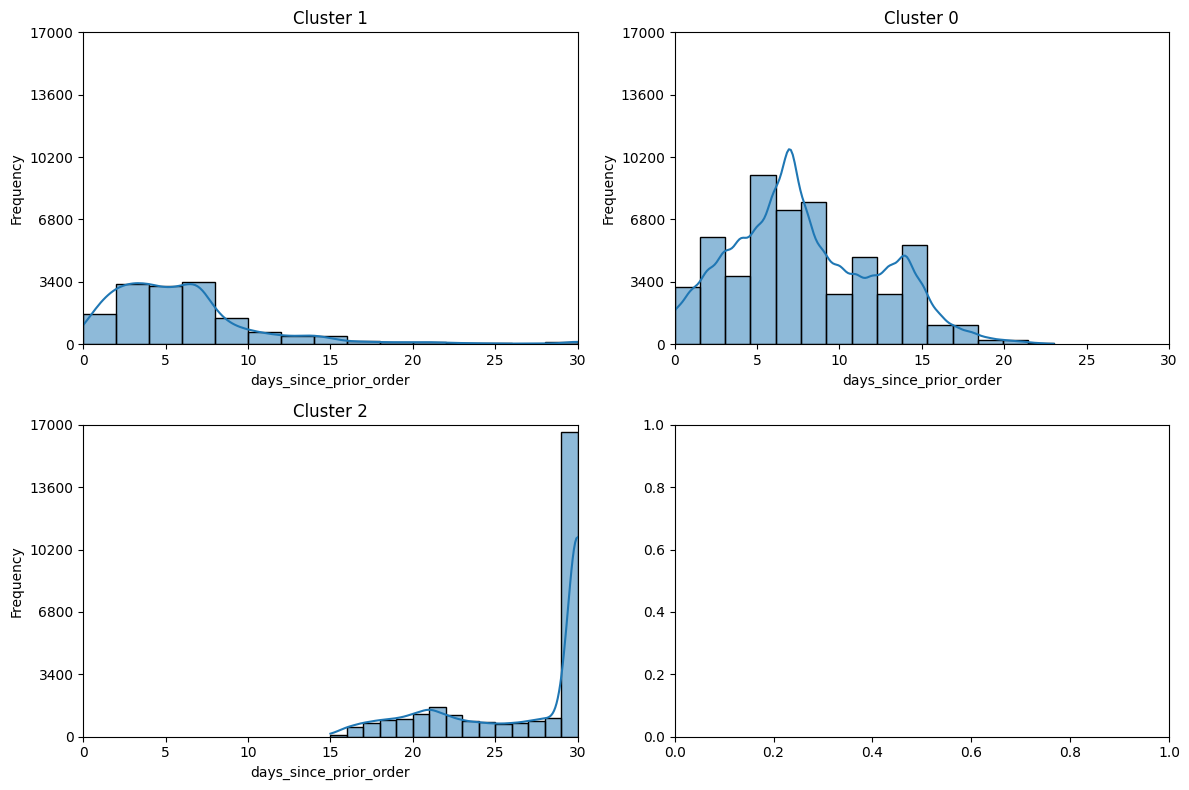

In [19]:
clusters = df_l3['Clusters_3'].unique()
n_clusters = len(clusters)

n_cols = 2
n_rows = math.ceil(n_clusters / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 8))

max_freq = 0
for cluster in clusters:
    freq, _ = np.histogram(df_l3[df_l3['Clusters_3'] == cluster]['days_since_prior_order'], bins=15)
    max_freq = max(max_freq, freq.max())

round_up_to_y = 1000 
max_freq_rounded = math.ceil(max_freq / round_up_to_y) * round_up_to_y

min_x = df_l3['days_since_prior_order'].min()
max_x = df_l3['days_since_prior_order'].max()

round_up_to_x = 5
min_x_rounded = math.floor(min_x / round_up_to_x) * round_up_to_x
max_x_rounded = math.ceil(max_x / round_up_to_x) * round_up_to_x

for i, cluster in enumerate(clusters):
    row = i // n_cols
    col = i % n_cols
    sns.histplot(
        df_l3[df_l3['Clusters_3'] == cluster]['days_since_prior_order'],
        kde=True, bins=15, ax=axes[row, col]
    )
    axes[row, col].set_title(f'Cluster {cluster}')
    axes[row, col].set_xlabel('days_since_prior_order')
    axes[row, col].set_ylabel('Frequency')
    
    axes[row, col].set_ylim(0, max_freq_rounded)
       
    axes[row, col].set_xlim(min_x_rounded, max_x_rounded)
      
    axes[row, col].yaxis.set_ticks(range(0, max_freq_rounded + 1, max_freq_rounded // 5))
        
    axes[row, col].xaxis.set_ticks(range(min_x_rounded, max_x_rounded + 1, round_up_to_x))

plt.tight_layout()
plt.show()

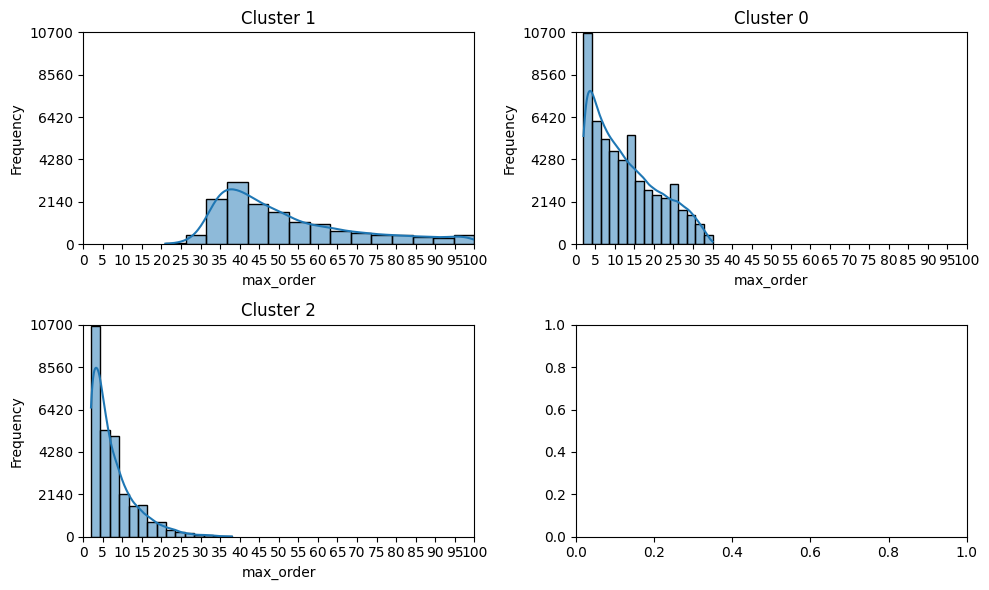

In [20]:
clusters = df_l3['Clusters_3'].unique()
n_clusters = len(clusters)

n_cols = 2
n_rows = math.ceil(n_clusters / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(10, 6))

max_freq = 0
for cluster in clusters:
    freq, _ = np.histogram(df_l3[df_l3['Clusters_3'] == cluster]['max_order'], bins=15)
    max_freq = max(max_freq, freq.max())

round_up_to_y = 100 
max_freq_rounded = math.ceil(max_freq / round_up_to_y) * round_up_to_y

min_x = df_l3['max_order'].min()
max_x = df_l3['max_order'].max()

round_up_to_x = 5
min_x_rounded = math.floor(min_x / round_up_to_x) * round_up_to_x
max_x_rounded = math.ceil(max_x / round_up_to_x) * round_up_to_x

for i, cluster in enumerate(clusters):
    row = i // n_cols
    col = i % n_cols
    sns.histplot(
        df_l3[df_l3['Clusters_3'] == cluster]['max_order'],
        kde=True, bins=15, ax=axes[row, col]
    )
    axes[row, col].set_title(f'Cluster {cluster}')
    axes[row, col].set_xlabel('max_order')
    axes[row, col].set_ylabel('Frequency')
    
    axes[row, col].set_ylim(0, max_freq_rounded)
       
    axes[row, col].set_xlim(min_x_rounded, max_x_rounded)
      
    axes[row, col].yaxis.set_ticks(range(0, max_freq_rounded + 1, max_freq_rounded // 5))
        
    axes[row, col].xaxis.set_ticks(range(min_x_rounded, max_x_rounded + 1, round_up_to_x))

plt.tight_layout()
plt.show()


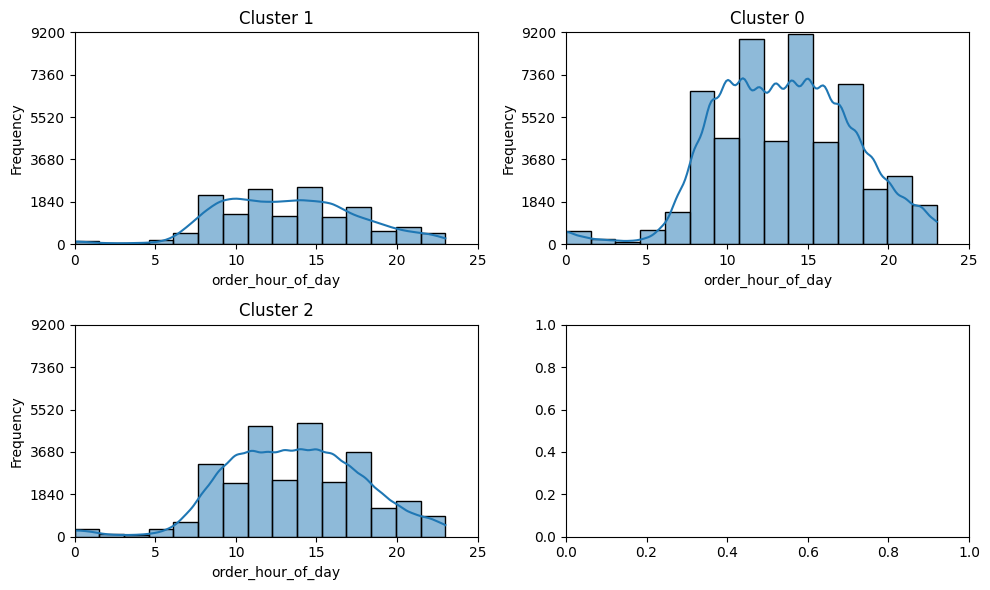

In [21]:
clusters = df_l3['Clusters_3'].unique()
n_clusters = len(clusters)

n_cols = 2
n_rows = math.ceil(n_clusters / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(10, 6))

max_freq = 0
for cluster in clusters:
    freq, _ = np.histogram(df_l3[df_l3['Clusters_3'] == cluster]['order_hour_of_day'], bins=15)
    max_freq = max(max_freq, freq.max())

round_up_to_y = 100 
max_freq_rounded = math.ceil(max_freq / round_up_to_y) * round_up_to_y

min_x = df_l3['order_hour_of_day'].min()
max_x = df_l3['order_hour_of_day'].max()

round_up_to_x = 5
min_x_rounded = math.floor(min_x / round_up_to_x) * round_up_to_x
max_x_rounded = math.ceil(max_x / round_up_to_x) * round_up_to_x

for i, cluster in enumerate(clusters):
    row = i // n_cols
    col = i % n_cols
    sns.histplot(
        df_l3[df_l3['Clusters_3'] == cluster]['order_hour_of_day'],
        kde=True, bins=15, ax=axes[row, col]
    )
    axes[row, col].set_title(f'Cluster {cluster}')
    axes[row, col].set_xlabel('order_hour_of_day')
    axes[row, col].set_ylabel('Frequency')
    
    axes[row, col].set_ylim(0, max_freq_rounded)
       
    axes[row, col].set_xlim(min_x_rounded, max_x_rounded)
      
    axes[row, col].yaxis.set_ticks(range(0, max_freq_rounded + 1, max_freq_rounded // 5))
        
    axes[row, col].xaxis.set_ticks(range(min_x_rounded, max_x_rounded + 1, round_up_to_x))

plt.tight_layout()
plt.show()


In [22]:
stats = df_l3.groupby('Clusters_3').agg(['mean', 'median'])

mode_df = df_l3.groupby('Clusters_3').agg(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan)
mode_df.columns = pd.MultiIndex.from_product([mode_df.columns, ['mode']])

stats = pd.concat([stats, mode_df], axis=1)

stats_formatted = stats.style.format("{:.2f}").set_caption("Estadísticas Descriptivas por Clúster").set_properties(**{
    'text-align': 'center'}).set_table_styles([{
    'selector': 'caption',
    'props': 'caption-side: top; font-size:16px; font-weight:bold; text-align:center;'
}])

stats_formatted

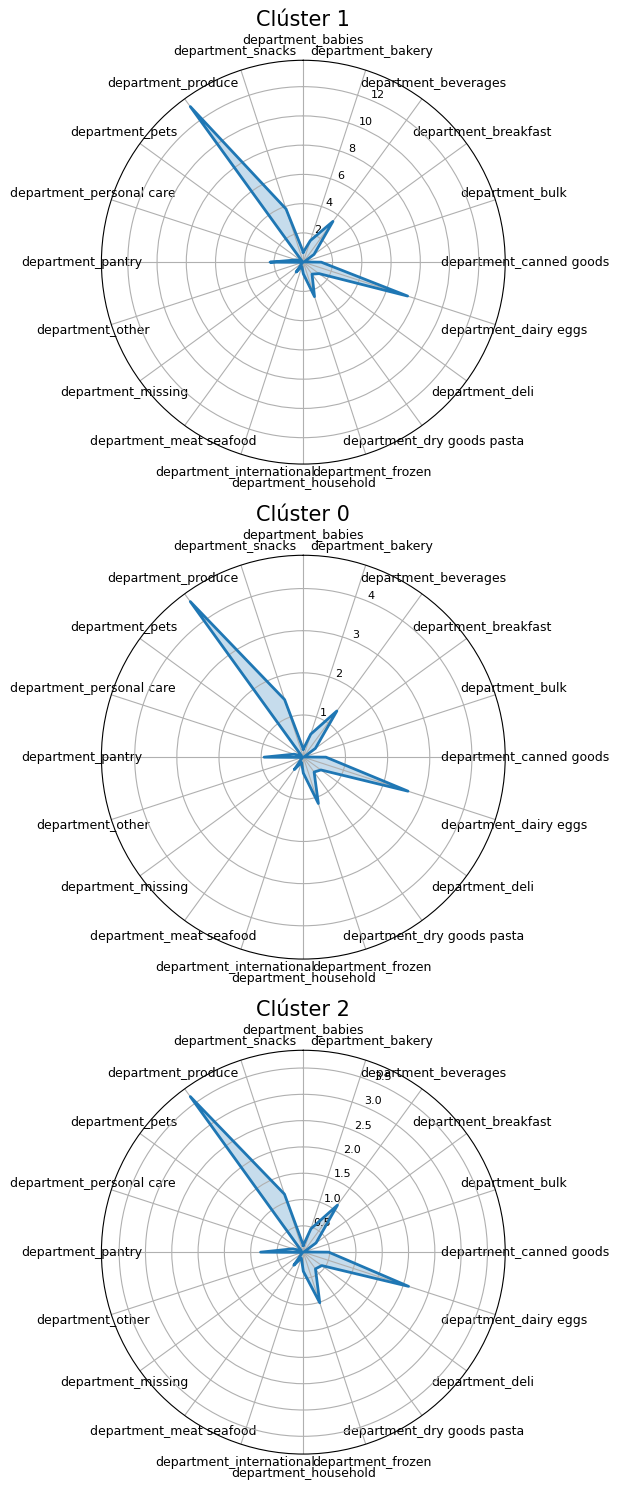

In [23]:
num_clusters = df_l3['Clusters_3'].nunique()
categories = department_columns

fig, axes = plt.subplots(num_clusters, 1, subplot_kw={'polar': True}, figsize=(10, 15))

for i, cluster in enumerate(df_l3['Clusters_3'].unique()):
    values = df_l3[df_l3['Clusters_3'] == cluster][categories].mean().values.flatten().tolist()
    values += values[:1] 
    angles = np.linspace(0, 2 * np.pi, len(categories), endpoint=False).tolist()
    angles += angles[:1]
    
    ax = axes[i] if num_clusters > 1 else axes
    ax.set_theta_offset(np.pi / 2)
    ax.set_theta_direction(-1)
    
    ax.plot(angles, values, linewidth=2, linestyle='solid')
    ax.fill(angles, values, alpha=0.25)
    ax.set_title(f'Clúster {cluster}', size=15)
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories, fontsize=9)
    ax.tick_params(axis='y', labelsize=8)

plt.tight_layout()
plt.show()

#### Análisis Crítico de la Clusterización de Tres Clústeres

##### 1. Solapamiento entre clusters
Los histogramas muestran una **alta superposición en los valores de "días desde la última compra"** entre los clusters, especialmente entre los clusters 0 y 2. Esto indica que los clusters no están claramente diferenciados y que no existe una segmentación clara que permita identificar comportamientos distintos entre los grupos.

##### 2. Distribuciones no homogéneas dentro de los clusters
El cluster 1 presenta una **distribución peculiar**, con un pico significativo en el extremo de los 30 días, lo que indica un patrón de compras mensuales. Sin embargo, este mismo cluster también tiene una cantidad considerable de compras más frecuentes, lo que sugiere una falta de cohesión dentro del cluster. Esto dificulta interpretaciones consistentes y una segmentación adecuada.

##### 3. Falta de utilidad práctica para la segmentación
Para que una clusterización sea útil, cada cluster debe representar un grupo de clientes con **patrones claramente diferenciados**. En este caso, no hay suficiente evidencia de que los clusters identificados sean representativos de patrones distintos de comportamiento. Por ejemplo, no se distingue adecuadamente entre clientes que compran semanalmente, quincenalmente o mensualmente.

##### 4. Desequilibrio en la frecuencia de observaciones entre clusters
Hay una **disparidad significativa en el tamaño de los clusters**, con el cluster 1 dominando claramente en términos de frecuencia. Esto puede sesgar cualquier análisis posterior y limitar la utilidad de los clusters más pequeños (como el cluster 2).

Por lo tanto, se decide avanzar con nuevos escenarios de clusterizacion

### Clustering - K-Means - n=4

c:\Users\marti\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


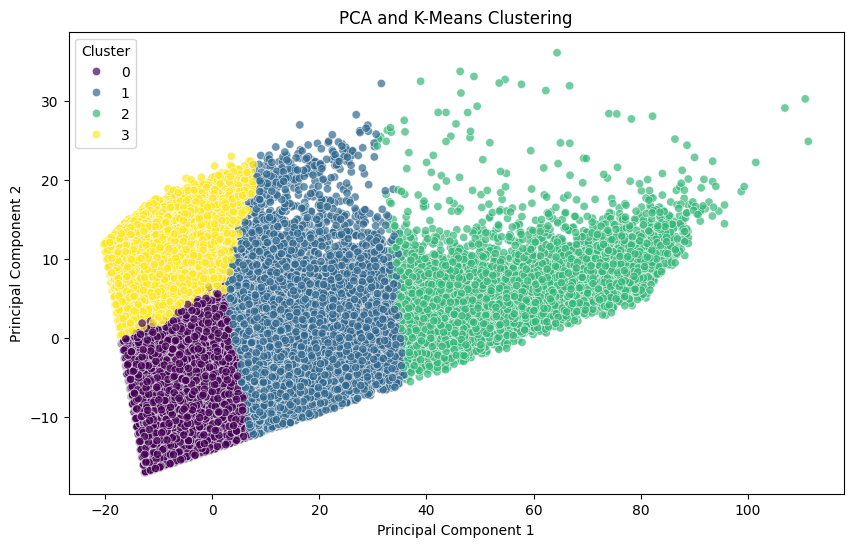

In [24]:
n_clusters = 4

kmeans4 = KMeans(n_clusters=n_clusters, random_state=100)
labels = kmeans4.fit_predict(X)

pca = PCA(n_components=2)
principal_components = pca.fit_transform(X)

df_c2 = pd.DataFrame(principal_components, columns=['PC1', 'PC2'])
df_c2['Cluster'] = labels

plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=df_c2, palette='viridis', alpha=0.7)
plt.title('PCA and K-Means Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

#### Observaciones de la Gráfica PCA y K-Means Clustering

#### **Separación Visual de los Clusters**
- **Cluster 0 (morado)**: Es el grupo más grande y se extiende hacia el extremo derecho, reflejando alta actividad.
- **Cluster 1 (amarillo) y Cluster 2 (verde)**: Más delimitados con límites claros.
- **Cluster 3 (azul)**: Bien definido, con menor densidad, posiblemente representando un grupo más específico.
- **Solapamiento**: Hay cierto solapamiento, especialmente entre Cluster 0 y Cluster 2, indicando posibles características intermedias.
- **Densidad**: Cluster 0 abarca un espacio más amplio, mientras que Cluster 1 y Cluster 3 son más compactos.

Los centros de los clusters son distinguibles, indicando patrones relevantes identificados por K-Means.
Los límites entre Cluster 0 y Cluster 2 no son totalmente claros, indicando posibles subgrupos.

A continuacion analizaremos las distancias entre puntos y centroides para confirmar la separación en alta dimensionalidad, como tambien se usaran metricas como Silhouette Score, Dunn Index o Calinski-Harabasz Index, para evaluar la clusterizacion


#### **Conclusión**
La gráfica PCA y K-Means Clustering muestra una buena distribución y separación general de los clusters. Sin embargo, el solapamiento entre algunos de ellos y la proyección reducida podrían ocultar detalles importantes.


                    count       mean        std       min        25%  \
Assigned_Cluster                                                       
0                 45352.0   9.943112   3.511449  2.042997   7.674929   
1                 20262.0  15.566182   6.627919  3.708047  11.466375   
2                  6072.0  23.335589  11.515883  6.355306  16.588540   
3                 27232.0   9.586143   4.047421  2.574893   6.969201   

                        50%        75%         max  
Assigned_Cluster                                    
0                  9.425773  11.545770   71.751417  
1                 13.996912  17.966300  104.623077  
2                 20.749010  27.316074  183.791006  
3                  8.574251  10.966470   57.333418  


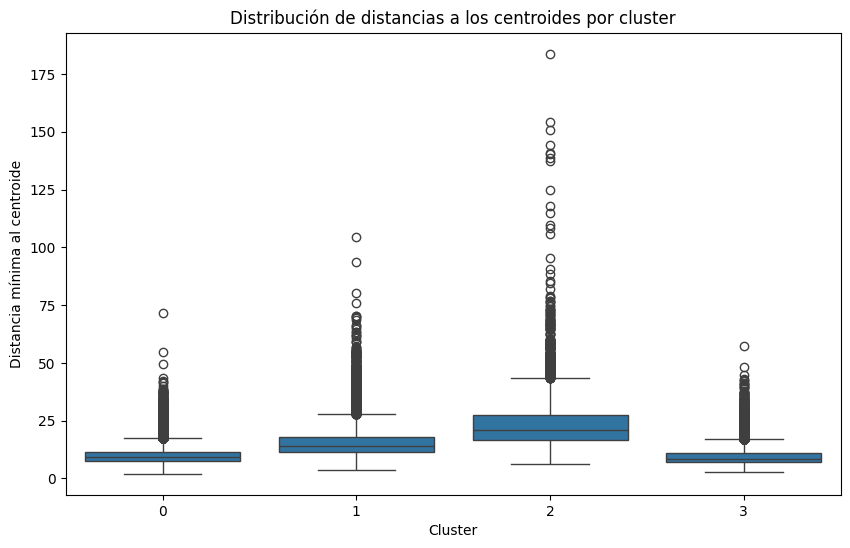

In [25]:
centroids = kmeans4.cluster_centers_

distances = []
for i, centroid in enumerate(centroids):
    cluster_distances = np.linalg.norm(X - centroid, axis=1)
    distances.append(cluster_distances)

distances_df = pd.DataFrame(distances).T
distances_df.columns = [f'Distance_to_Cluster_{i}' for i in range(len(centroids))]

distances_df['Assigned_Cluster'] = kmeans4.labels_
distances_df['Min_Distance'] = distances_df.apply(
    lambda row: row[f"Distance_to_Cluster_{int(row.Assigned_Cluster)}"], axis=1
)

summary = distances_df.groupby('Assigned_Cluster')['Min_Distance'].describe()
print(summary)

plt.figure(figsize=(10, 6))
sns.boxplot(x='Assigned_Cluster', y='Min_Distance', data=distances_df)
plt.title('Distribución de distancias a los centroides por cluster')
plt.xlabel('Cluster')
plt.ylabel('Distancia mínima al centroide')
plt.show()

#### Distribución de Distancias a los Centroides por Cluster

  - Las distancias mínimas tienen medianas similares (15-25 unidades), indicando buena cercanía a los centroides.
  - Todos los clusters presentan outliers, reflejando cierta heterogeneidad.

  - El Cluster 0 muestra mayor dispersión y outliers extremos, sugiriendo heterogeneidad o subgrupos internos.
  - Los Clusters 1 y 3 son compactos, homogéneos, con baja dispersión.
  - El Cluser 2 muestra dispersión moderada con algunos outliers.

Conclusión: Los clusters son mayormente compactos, pero la dispersión y los outliers en Cluster 0 sugieren la necesidad de un refinamiento adicional del modelo.
Igualmente se realizaran los calculos de Silhouette Score, Calinski-Harabasz Index, y Dunn Index para terminar de descartar la clsuterizacion con n=4



In [26]:
silhouette = silhouette_score(X, kmeans4.labels_)
print(f"Silhouette Score: {silhouette:.4f}")

calinski_harabasz = calinski_harabasz_score(X, kmeans4.labels_)
print(f"Calinski-Harabasz Index: {calinski_harabasz:.4f}")

def dunn_index(X, labels):
    unique_clusters = np.unique(labels)
    cluster_distances = []
    intra_cluster_distances = []
    
    for i in range(len(unique_clusters)):
        for j in range(i + 1, len(unique_clusters)):
            points_i = X[labels == unique_clusters[i]]
            points_j = X[labels == unique_clusters[j]]
            dist = np.min(cdist(points_i, points_j))
            cluster_distances.append(dist)
    
    for cluster in unique_clusters:
        points_in_cluster = X[labels == cluster]
        dist = np.max(cdist(points_in_cluster, points_in_cluster))
        intra_cluster_distances.append(dist)
    
    return np.min(cluster_distances) / np.max(intra_cluster_distances)

dunn = dunn_index(X, kmeans4.labels_)
print(f"Dunn Index: {dunn:.4f}")

Silhouette Score: 0.3335
Calinski-Harabasz Index: 65135.2089
Dunn Index: 0.0045


#### Interpretación de las Métricas de Clusterización

##### 1. Silhouette Score
- **Valor**: 0.3335
- Valor bajo (< 0.5) indica solapamiento entre clusters y separación no clara. Es posible que sea necesario ajustar el número de clusters o el modelo.

##### 2. Calinski-Harabasz Index
- **Valor**: 65135.2089
- Valor alto indica clusters compactos y separados, pero este valor alto puede ser consecuencia de la magnitud de los datos trabajados.

##### 3. Dunn Index
- **Valor**: 0.0045
- Valor bajo refleja clusters mal separados y cercanos entre sí.

##### Conclusión
- Silhouette Score bajo y Dunn Index bajo sugieren solapamiento entre clusters.
- Calinski-Harabasz Index alto indica densidad razonable, pero no confirma separación ideal.

In [27]:
df_l4 = df[['user_id','department_babies', 'department_bakery', 'department_beverages', 'department_breakfast', 'department_bulk', 
        'department_canned goods', 'department_dairy eggs', 'department_deli', 
        'department_dry goods pasta', 'department_frozen', 'department_household', 
        'department_international', 'department_meat seafood', 'department_missing', 
        'department_other', 'department_pantry', 'department_personal care', 
        'department_pets', 'department_produce', 'department_snacks', 'max_order', 'order_hour_of_day', 'days_since_prior_order']]

In [28]:
df_l4['Clusters_4'] = kmeans4.labels_

C:\Users\marti\AppData\Local\Temp\ipykernel_33240\3530558166.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_l4['Clusters_4'] = kmeans4.labels_


In [29]:
df_l4.head()

user_id  department_babies  department_bakery  department_beverages  \
0   147243                  0                  1                     1   
1   195275                  0                  3                     4   
2    58222                  0                  0                     1   
3   120094                  0                  0                     2   
4    53959                  2                  0                     3   

   department_breakfast  department_bulk  department_canned goods  \
0                     2                0                        2   
1                     0                0                        0   
2                     0                0                        0   
3                     0                0                        0   
4                     1                0                        0   

   department_dairy eggs  department_deli  department_dry goods pasta  ...  \
0                     31                7                           3  ...   
1                      6                1                           4  ...   
2                      6                0                           0  ...   
3                      1                0                           0  ...   
4                      4                0                           0  ...   

   department_other  department_pantry  department_personal care  \
0                 0                  4                         1   
1                 0                  1                         0   
2                 0                  4                         0   
3                 0                  1                         0   
4                 0                  0                         9   

   department_pets  department_produce  department_snacks  max_order  \
0                0                  18                  4         38   
1                0                  24                  5         90   
2                0                   3                  0          3   
3                0                   3                  1         18   
4                0                   5                  2          8   

   order_hour_of_day  days_since_prior_order  Clusters_4  
0                 16                     3.0           1  
1                 11                     3.0           2  
2                 11                     6.0           0  
3                 17                     7.0           0  
4                  1                    30.0           3  

[5 rows x 25 columns]

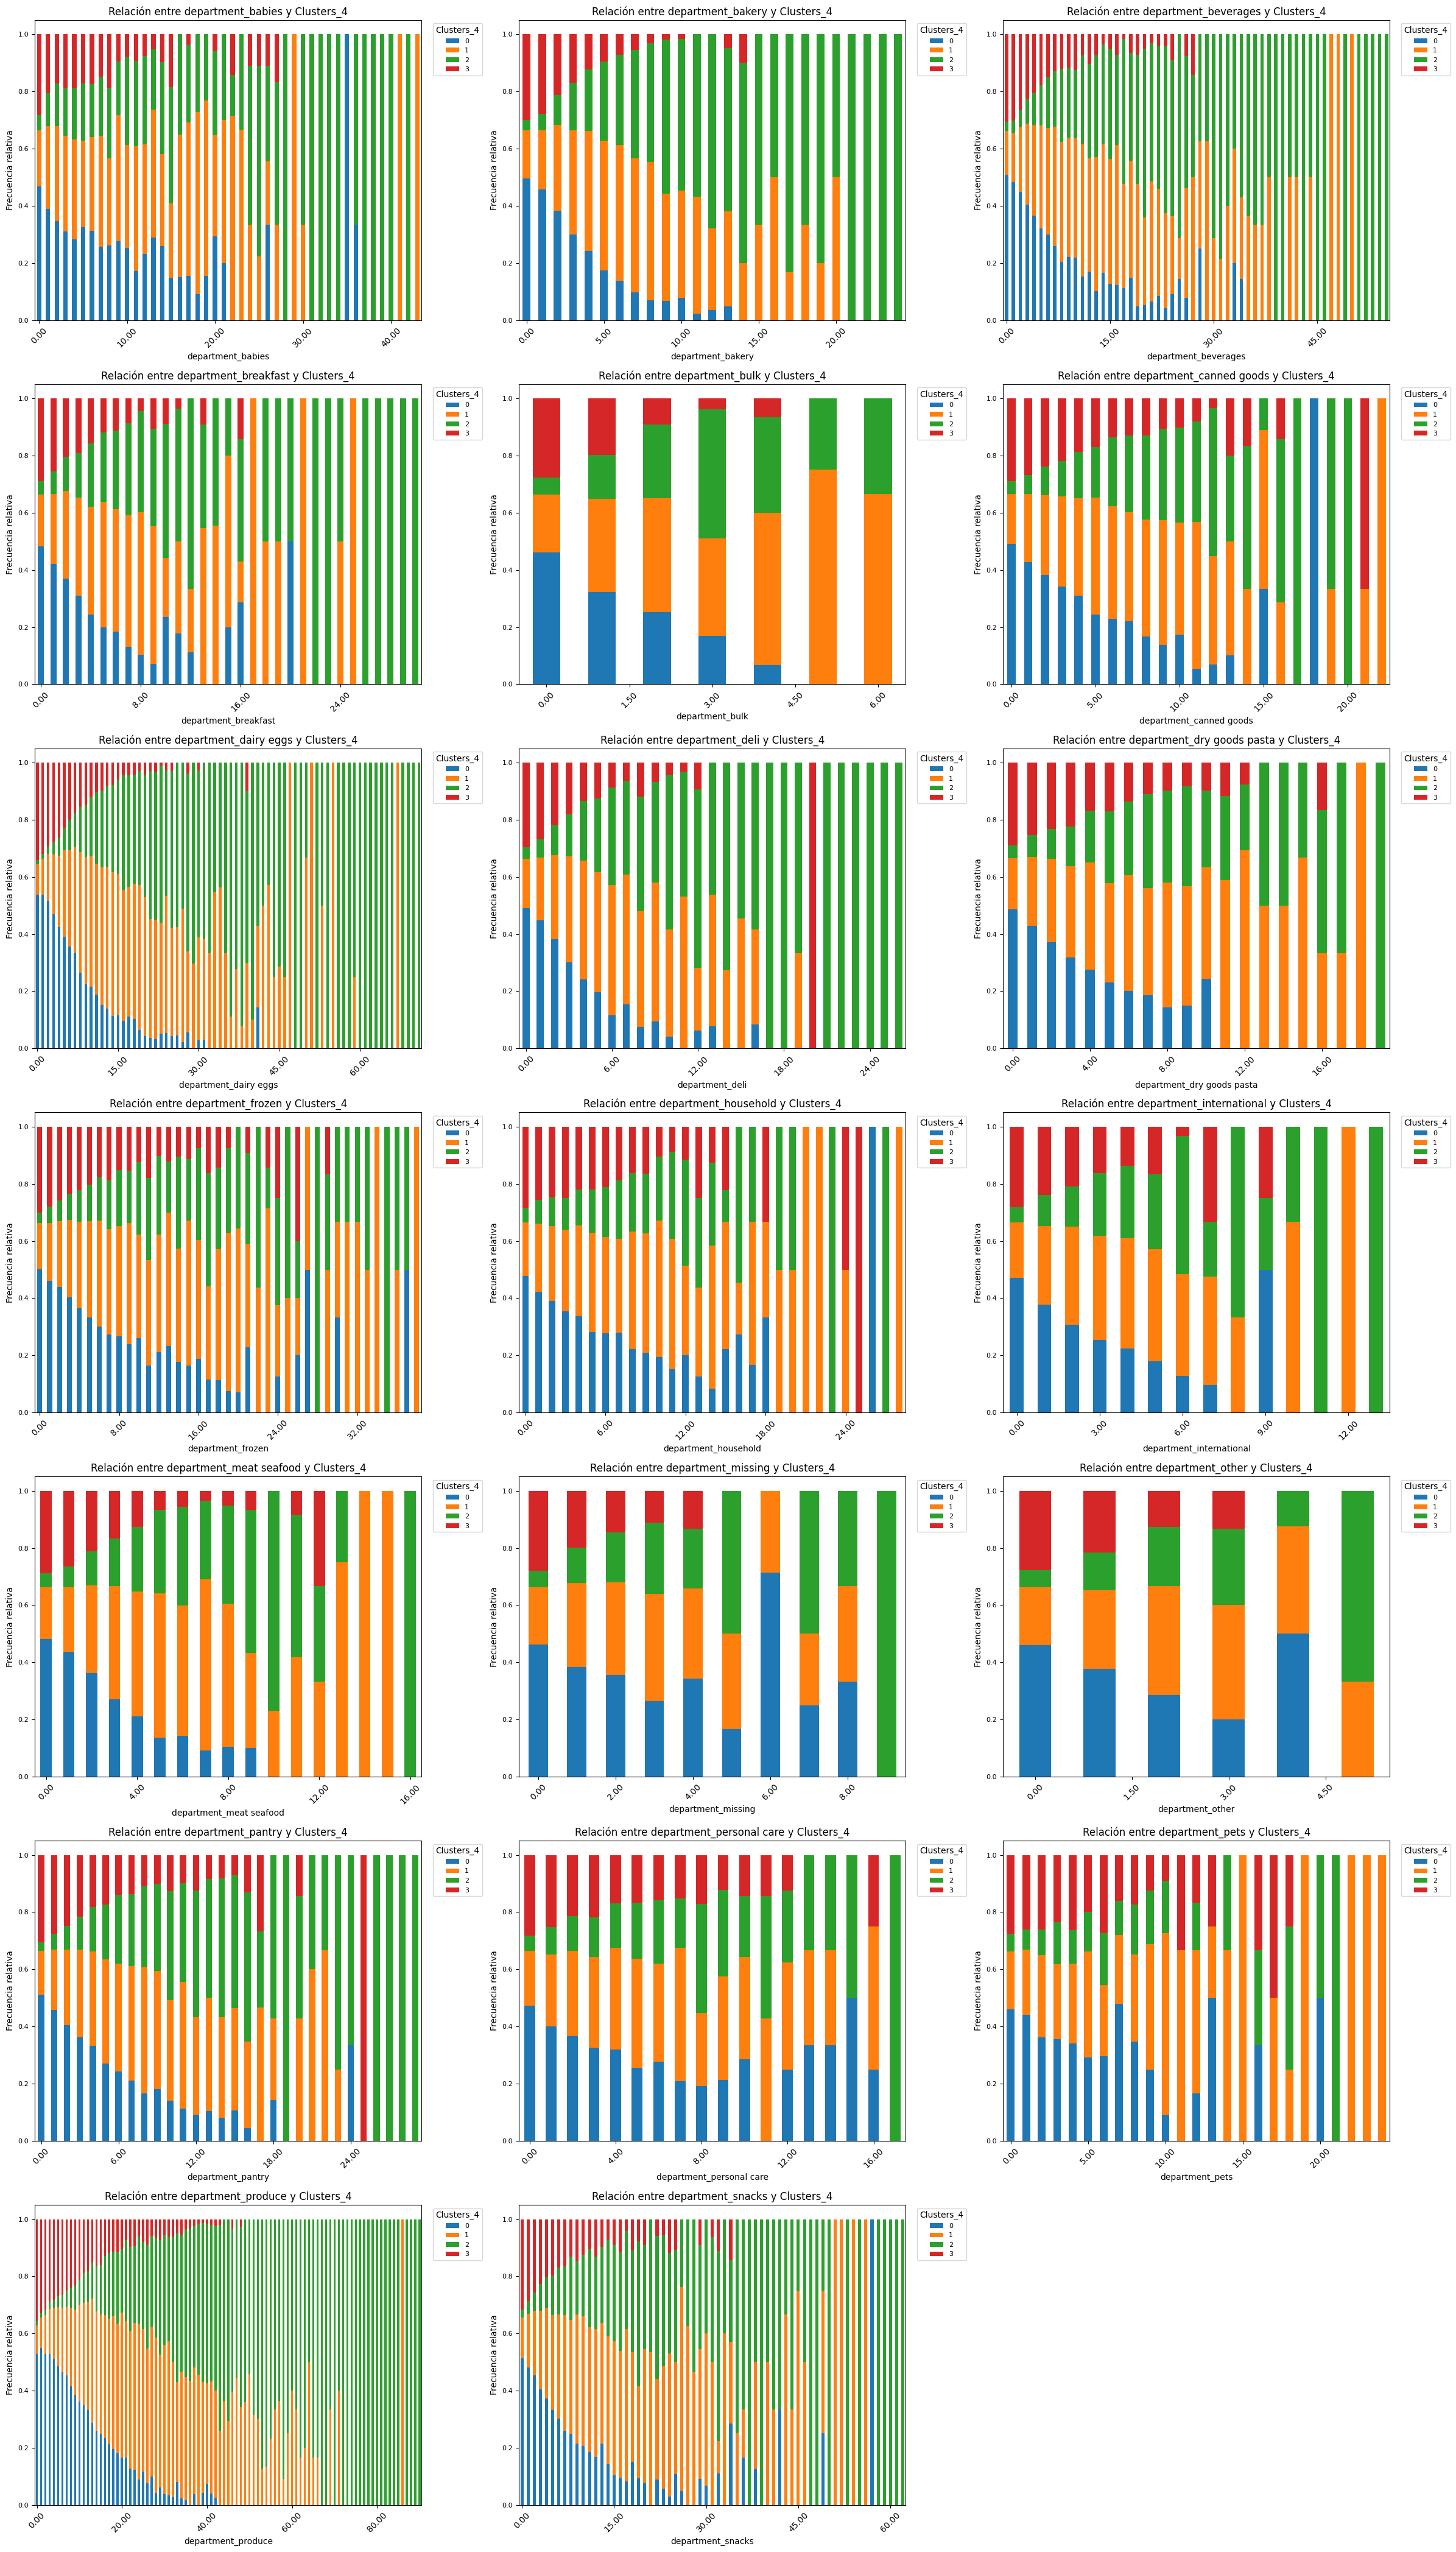

In [30]:
department_columns = [col for col in df_l4.columns if col.startswith('department')]

num_rows = 7
num_cols = 3

fig, axs = plt.subplots(num_rows, num_cols, figsize=(8 * num_cols, 6 * num_rows))

for i, columna in enumerate(department_columns):
    if i >= num_rows * num_cols:
        break
    
    row = i // num_cols
    col = i % num_cols

    frecuencias = df_l4.groupby(columna)['Clusters_4'].value_counts(normalize=True).unstack()
    frecuencias.plot(kind='bar', stacked=True, ax=axs[row, col])
    
    axs[row, col].set_title(f'Relación entre {columna} y Clusters_4', fontsize=12)
    axs[row, col].set_xlabel(columna, fontsize=10)
    axs[row, col].set_ylabel('Frecuencia relativa', fontsize=10)
    axs[row, col].tick_params(axis='x', rotation=45, labelsize=10)
    axs[row, col].tick_params(axis='y', labelsize=8)

    axs[row, col].legend(title='Clusters_4', fontsize=8, bbox_to_anchor=(1.02, 1), loc='upper left')
    
    axs[row, col].xaxis.set_major_locator(ticker.MaxNLocator(5))
    axs[row, col].xaxis.set_major_formatter(ticker.FormatStrFormatter('%.2f'))

for j in range(i + 1, num_rows * num_cols):
    fig.delaxes(axs[j // num_cols, j % num_cols])

plt.tight_layout()
plt.show()

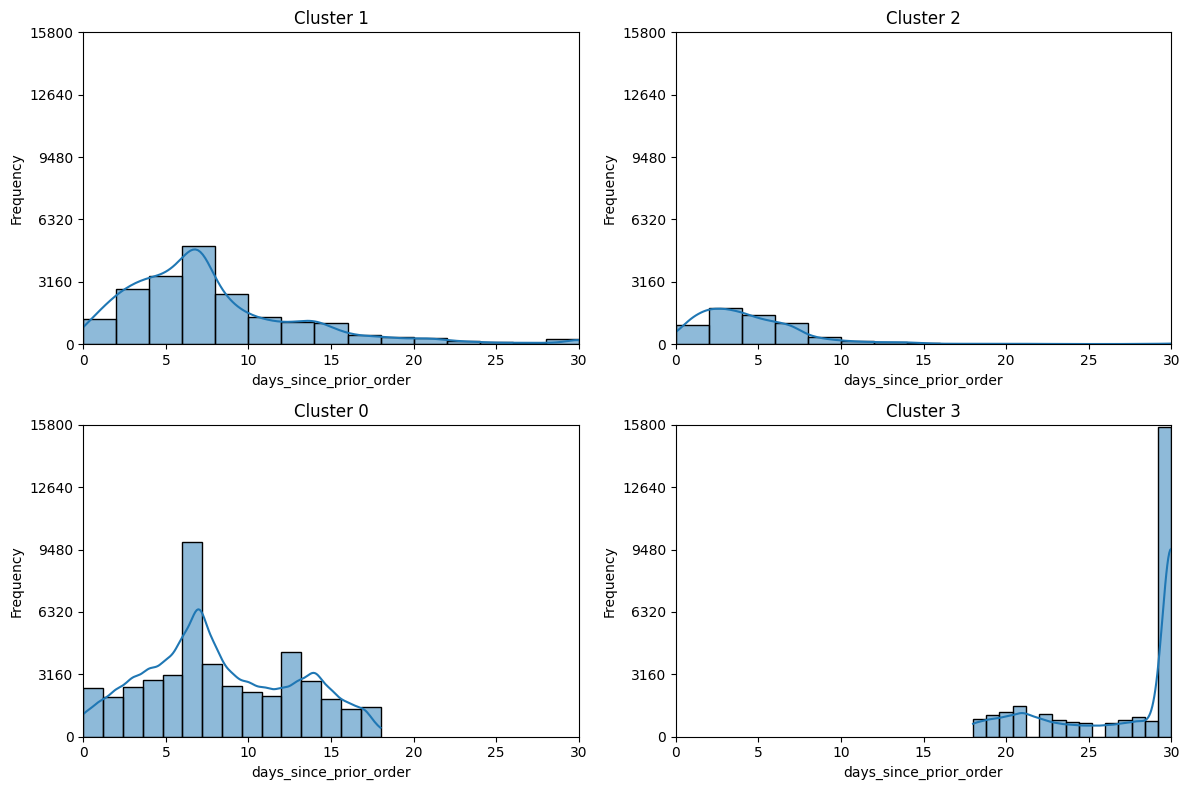

In [31]:
clusters = df_l4['Clusters_4'].unique()
n_clusters = len(clusters)

n_cols = 2
n_rows = math.ceil(n_clusters / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 8))

max_freq = 0
for cluster in clusters:
    freq, _ = np.histogram(df_l4[df_l4['Clusters_4'] == cluster]['days_since_prior_order'], bins=15)
    max_freq = max(max_freq, freq.max())

round_up_to_y = 100 
max_freq_rounded = math.ceil(max_freq / round_up_to_y) * round_up_to_y

min_x = df_l4['days_since_prior_order'].min()
max_x = df_l4['days_since_prior_order'].max()

round_up_to_x = 5
min_x_rounded = math.floor(min_x / round_up_to_x) * round_up_to_x
max_x_rounded = math.ceil(max_x / round_up_to_x) * round_up_to_x

for i, cluster in enumerate(clusters):
    row = i // n_cols
    col = i % n_cols
    sns.histplot(
        df_l4[df_l4['Clusters_4'] == cluster]['days_since_prior_order'],
        kde=True, bins=15, ax=axes[row, col]
    )
    axes[row, col].set_title(f'Cluster {cluster}')
    axes[row, col].set_xlabel('days_since_prior_order')
    axes[row, col].set_ylabel('Frequency')
    
    axes[row, col].set_ylim(0, max_freq_rounded)
       
    axes[row, col].set_xlim(min_x_rounded, max_x_rounded)
      
    axes[row, col].yaxis.set_ticks(range(0, max_freq_rounded + 1, max_freq_rounded // 5))
        
    axes[row, col].xaxis.set_ticks(range(min_x_rounded, max_x_rounded + 1, round_up_to_x))

plt.tight_layout()
plt.show()

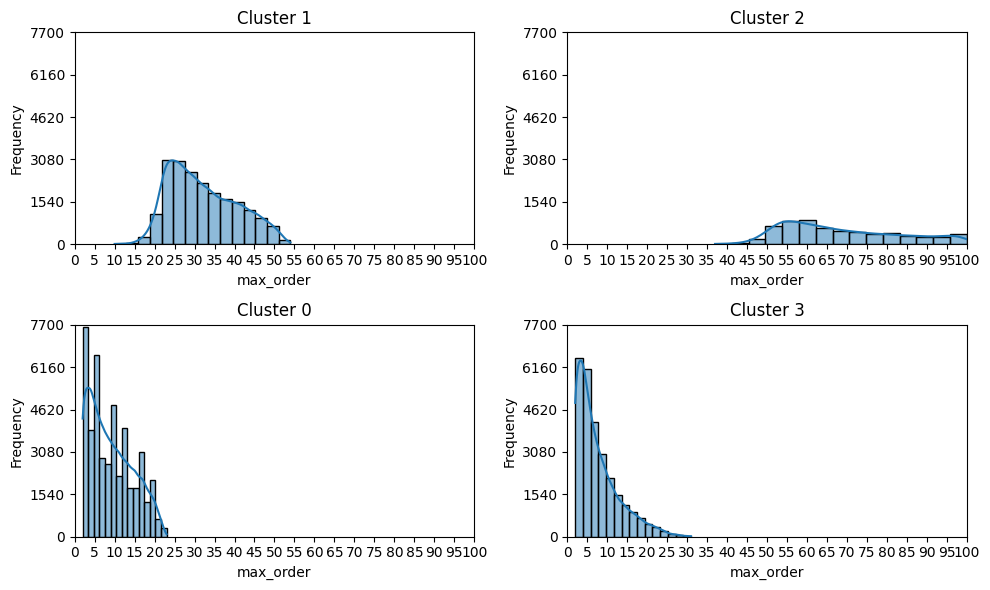

In [32]:
clusters = df_l4['Clusters_4'].unique()
n_clusters = len(clusters)

n_cols = 2
n_rows = math.ceil(n_clusters / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(10, 6))

max_freq = 0
for cluster in clusters:
    freq, _ = np.histogram(df_l4[df_l4['Clusters_4'] == cluster]['max_order'], bins=15)
    max_freq = max(max_freq, freq.max())

round_up_to_y = 100 
max_freq_rounded = math.ceil(max_freq / round_up_to_y) * round_up_to_y

min_x = df_l4['max_order'].min()
max_x = df_l4['max_order'].max()

round_up_to_x = 5
min_x_rounded = math.floor(min_x / round_up_to_x) * round_up_to_x
max_x_rounded = math.ceil(max_x / round_up_to_x) * round_up_to_x

for i, cluster in enumerate(clusters):
    row = i // n_cols
    col = i % n_cols
    sns.histplot(
        df_l4[df_l4['Clusters_4'] == cluster]['max_order'],
        kde=True, bins=15, ax=axes[row, col]
    )
    axes[row, col].set_title(f'Cluster {cluster}')
    axes[row, col].set_xlabel('max_order')
    axes[row, col].set_ylabel('Frequency')
    
    axes[row, col].set_ylim(0, max_freq_rounded)
       
    axes[row, col].set_xlim(min_x_rounded, max_x_rounded)
      
    axes[row, col].yaxis.set_ticks(range(0, max_freq_rounded + 1, max_freq_rounded // 5))
        
    axes[row, col].xaxis.set_ticks(range(min_x_rounded, max_x_rounded + 1, round_up_to_x))

plt.tight_layout()
plt.show()



In [33]:
product_columns = [col for col in df_l4.columns if col.startswith('department_')]

cluster_product_totals = df_l4.groupby('Clusters_4')[product_columns].sum()

cluster_product_totals

department_babies  department_bakery  department_beverages  \
Clusters_4                                                               
0                        6795              22113                 52445   
1                        8619              21981                 49696   
2                        5661              11614                 25898   
3                        3558              12722                 30061   

            department_breakfast  department_bulk  department_canned goods  \
Clusters_4                                                                   
0                          13699              577                    20728   
1                          13250              721                    19275   
2                           6648              421                     8654   
3                           8136              317                    13187   

            department_dairy eggs  department_deli  \
Clusters_4                                           
0                           97805            19718   
1                          105375            19529   
2                           56588             9896   
3                           57198            11791   

            department_dry goods pasta  department_frozen  \
Clusters_4                                                  
0                                16974              45570   
1                                15573              39695   
2                                 7208              17260   
3                                10720              27524   

            department_household  department_international  \
Clusters_4                                                   
0                          15118                      5043   
1                          12693                      4853   
2                           5495                      2347   
3                           9933                      3287   

            department_meat seafood  department_missing  department_other  \
Clusters_4                                                                  
0                             14059                1682               740   
1                             13206                1413               623   
2                              5820                 719               320   
3                              8399                 794               405   

            department_pantry  department_personal care  department_pets  \
Clusters_4                                                                 
0                       36376                      9159             1946   
1                       33397                      7838             1693   
2                       16846                      3523              686   
3                       22181                      5634             1297   

            department_produce  department_snacks  
Clusters_4                                         
0                       170024              54252  
1                       184608              55996  
2                        99805              28015  
3                        99479              31592

#### Análisis Crítico de la Clusterización de Cuatro Clústeres

##### 1. Solapamiento en las Distribuciones de "max_order"
Los histogramas muestran que las distribuciones de "max_order" entre los clusters tienen solapamientos significativos. Por ejemplo:
Los Clusters 1 y 3 tienen distribuciones muy similares con alta concentración en valores bajos de "max_order".
El Cluster 0 parece centrarse en valores más altos, pero aún tiene superposición con el cluster 2.
Esto muestra que los clusters no logran diferenciar claramente grupos de clientes según su historial de compras acumulado.


##### 2. Falta de Separación en las Preferencias por Departamento
En las gráficas de relación entre departamentos y clusters, se observa que no hay diferencias significativas y consistentes entre los clusters:
Los clusters tienen patrones similares de participación en departamentos tales como produce, dairy eggs y snacks.

La falta de exclusividad en los patrones por cluster reduce la capacidad de segmentación útil.

##### 3. Distribución de "days_since_prior_order"
Aunque algunos clusters muestran ligeras diferencias en las distribuciones de esta variable, hay solapamientos significativos que dificultan la distinción de grupos de clientes:
El Cluster 1 tiene un patrón bimodal, pero sus picos se encuentran cerca de los de otros clusters.
El Cluster 2, que debería reflejar clientes con pedidos casi diarios, también comparte una porción considerable con otros clusters en valores bajos de "days_since_prior_order".
La distribución del Cluster 3, que concentra clientes con compras mensuales, es el único con cierta diferenciación clara, pero representa un segmento específico que no justifica por sí solo la utilidad de toda la clusterización.


---

### Clustering - K-Means - n=5

Si bien la clusterización anterior arroja resultados positivos, se decide avanzar con la implementación de 5 clusters para analizar como se comportan los diferentes grupos generados y buscar una mejora en la segmentación de clientes.

c:\Users\marti\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


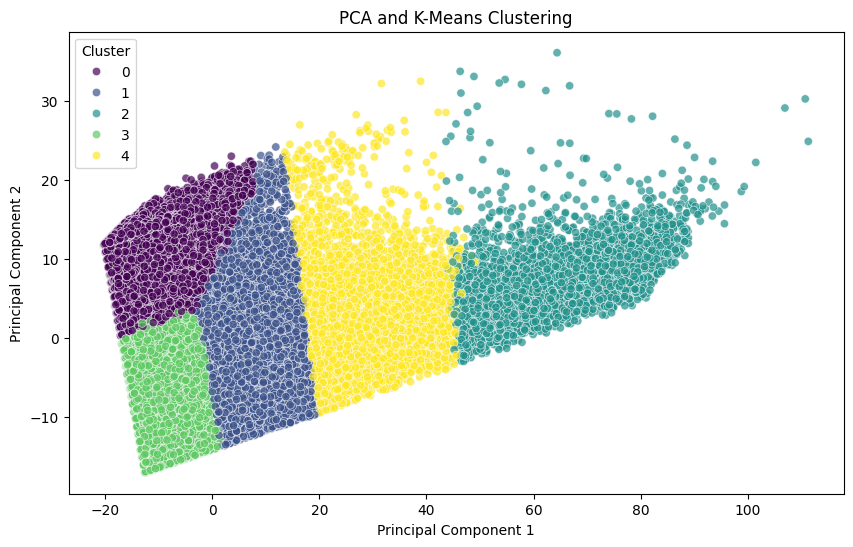

In [34]:
n_clusters = 5

kmeans5 = KMeans(n_clusters=n_clusters, random_state=100)
labels = kmeans5.fit_predict(X)

pca = PCA(n_components=2)
principal_components = pca.fit_transform(X)

df_c5 = pd.DataFrame(principal_components, columns=['PC1', 'PC2'])
df_c5['Cluster'] = labels

plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=df_c5, palette='viridis', alpha=0.7)
plt.title('PCA and K-Means Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

In [35]:
df_l5 = df[['department_babies', 'department_bakery', 'department_beverages', 'department_breakfast', 'department_bulk', 
        'department_canned goods', 'department_dairy eggs', 'department_deli', 
        'department_dry goods pasta', 'department_frozen', 'department_household', 
        'department_international', 'department_meat seafood', 'department_missing', 
        'department_other', 'department_pantry', 'department_personal care', 
        'department_pets', 'department_produce', 'department_snacks', 'max_order', 'order_hour_of_day', 'days_since_prior_order']]

In [36]:
df_l5['Clusters_5'] = kmeans5.labels_

C:\Users\marti\AppData\Local\Temp\ipykernel_33240\2224673139.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_l5['Clusters_5'] = kmeans5.labels_


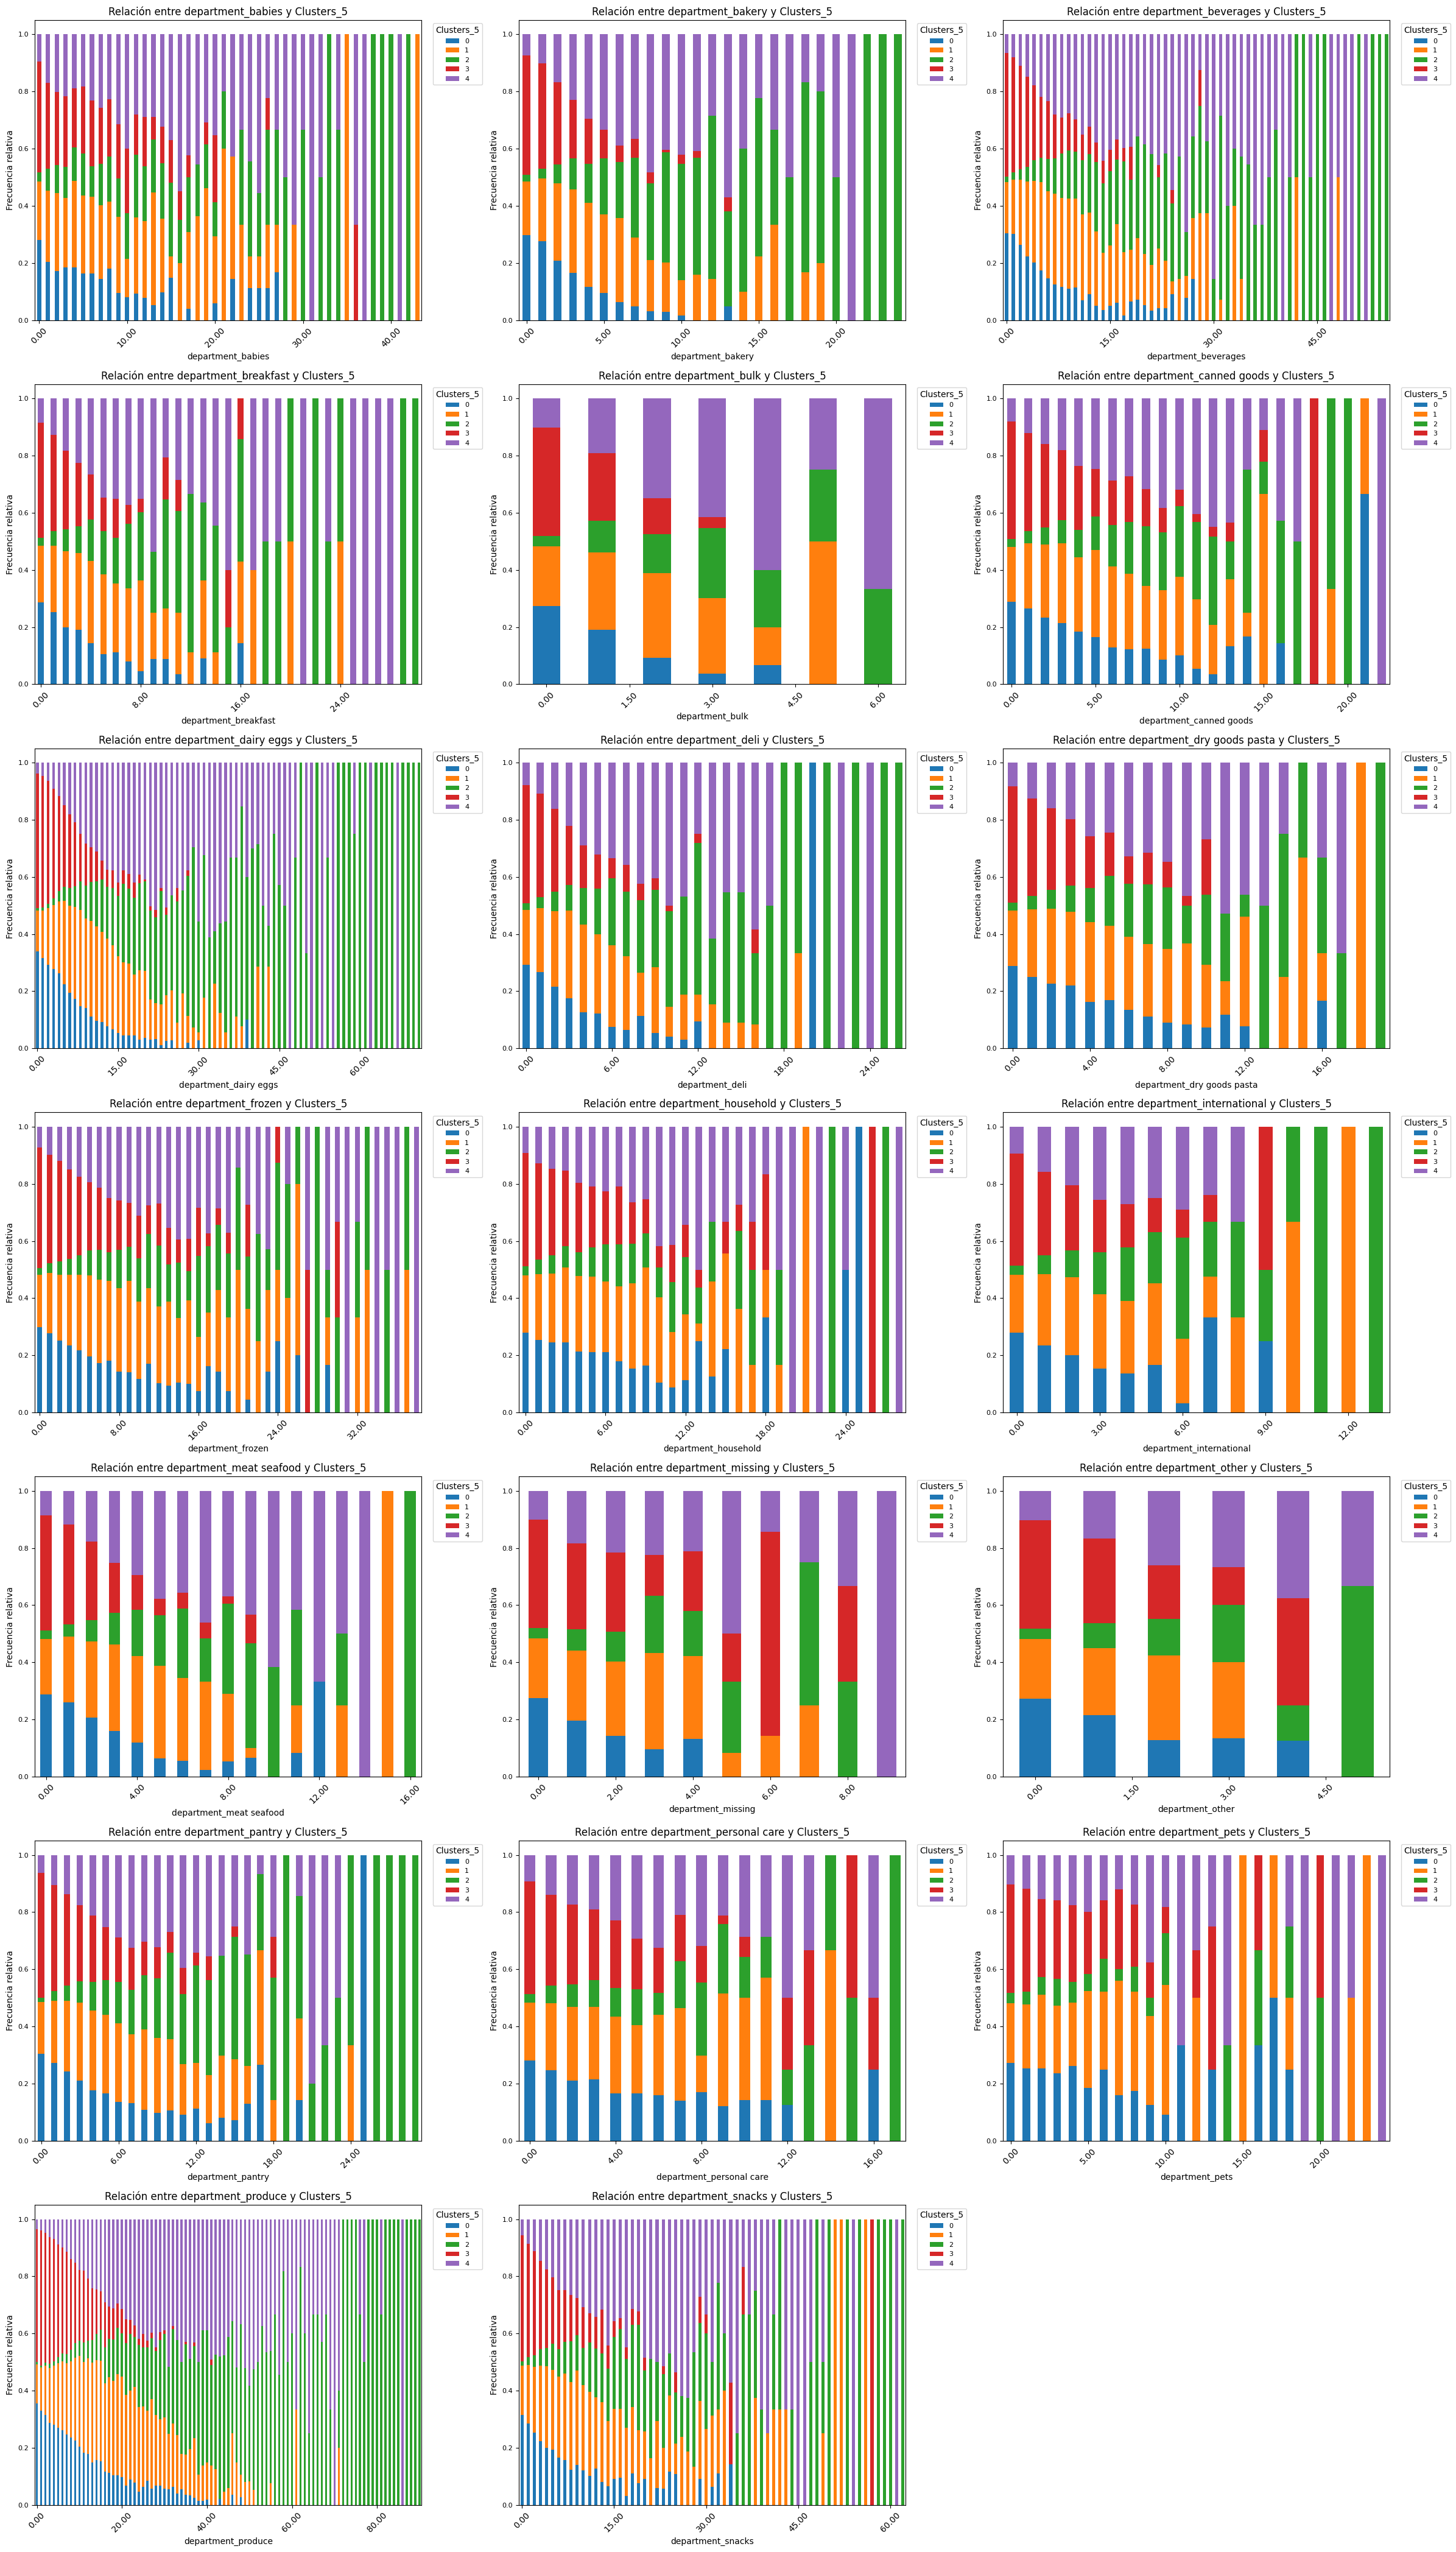

In [37]:
department_columns = [col for col in df_l5.columns if col.startswith('department')]

num_rows = 7
num_cols = 3

fig, axs = plt.subplots(num_rows, num_cols, figsize=(8 * num_cols, 6 * num_rows))

for i, columna in enumerate(department_columns):
    if i >= num_rows * num_cols:
        break
    
    row = i // num_cols
    col = i % num_cols

    frecuencias = df_l5.groupby(columna)['Clusters_5'].value_counts(normalize=True).unstack()
    frecuencias.plot(kind='bar', stacked=True, ax=axs[row, col])
    
    axs[row, col].set_title(f'Relación entre {columna} y Clusters_5', fontsize=12)
    axs[row, col].set_xlabel(columna, fontsize=10)
    axs[row, col].set_ylabel('Frecuencia relativa', fontsize=10)
    axs[row, col].tick_params(axis='x', rotation=45, labelsize=10)
    axs[row, col].tick_params(axis='y', labelsize=8)

    axs[row, col].legend(title='Clusters_5', fontsize=8, bbox_to_anchor=(1.02, 1), loc='upper left')
    
    axs[row, col].xaxis.set_major_locator(ticker.MaxNLocator(5))
    axs[row, col].xaxis.set_major_formatter(ticker.FormatStrFormatter('%.2f'))

for j in range(i + 1, num_rows * num_cols):
    fig.delaxes(axs[j // num_cols, j % num_cols])

plt.tight_layout()
plt.show()

In [38]:
stats = df_l5.groupby('Clusters_5').agg(['mean', 'median'])

mode_df = df_l5.groupby('Clusters_5').agg(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan)
mode_df.columns = pd.MultiIndex.from_product([mode_df.columns, ['mode']])

stats = pd.concat([stats, mode_df], axis=1)

stats_formatted = stats.style.format("{:.2f}").set_caption("Estadísticas Descriptivas por Clúster").set_properties(**{
    'text-align': 'center'}).set_table_styles([{
    'selector': 'caption',
    'props': 'caption-side: top; font-size:16px; font-weight:bold; text-align:center;'
}])

stats_formatted

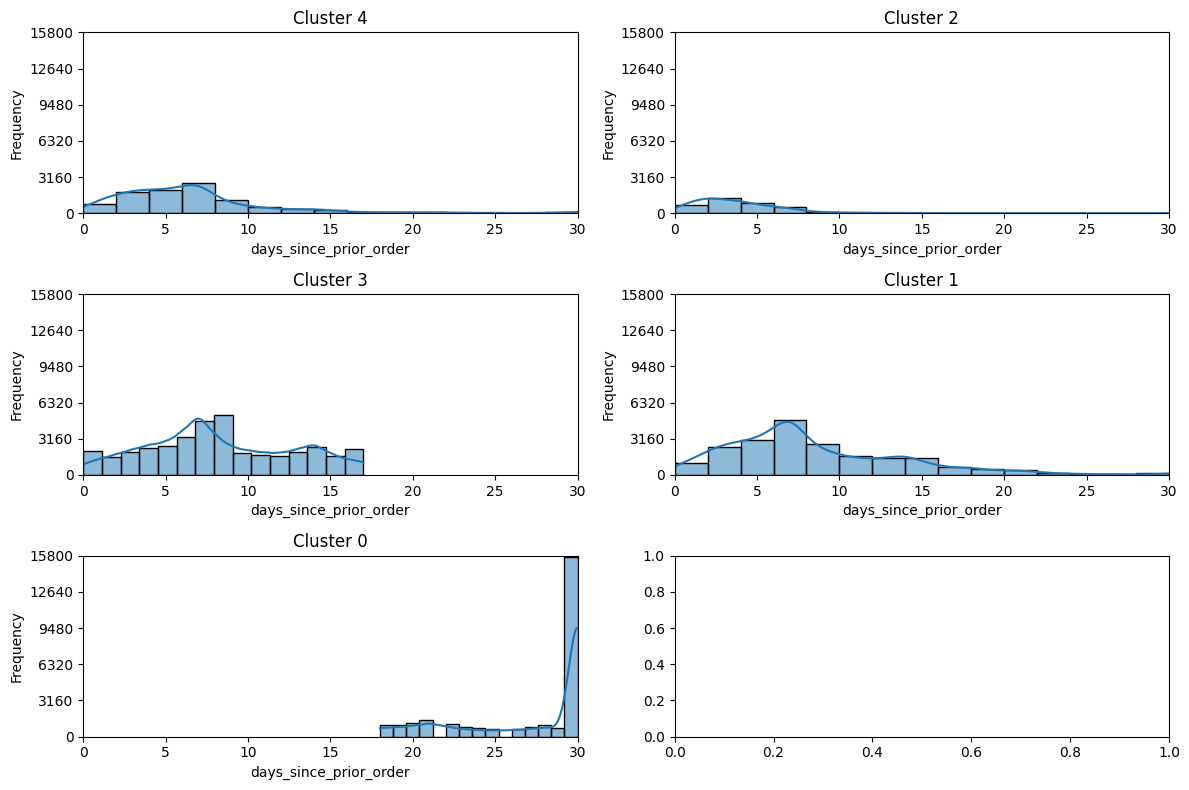

In [39]:
clusters = df_l5['Clusters_5'].unique()
n_clusters = len(clusters)

n_cols = 2
n_rows = math.ceil(n_clusters / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 8))

max_freq = 0
for cluster in clusters:
    freq, _ = np.histogram(df_l5[df_l5['Clusters_5'] == cluster]['days_since_prior_order'], bins=15)
    max_freq = max(max_freq, freq.max())

round_up_to_y = 100 
max_freq_rounded = math.ceil(max_freq / round_up_to_y) * round_up_to_y

min_x = df_l5['days_since_prior_order'].min()
max_x = df_l5['days_since_prior_order'].max()

round_up_to_x = 5
min_x_rounded = math.floor(min_x / round_up_to_x) * round_up_to_x
max_x_rounded = math.ceil(max_x / round_up_to_x) * round_up_to_x

for i, cluster in enumerate(clusters):
    row = i // n_cols
    col = i % n_cols
    sns.histplot(
        df_l5[df_l5['Clusters_5'] == cluster]['days_since_prior_order'],
        kde=True, bins=15, ax=axes[row, col]
    )
    axes[row, col].set_title(f'Cluster {cluster}')
    axes[row, col].set_xlabel('days_since_prior_order')
    axes[row, col].set_ylabel('Frequency')
    
    axes[row, col].set_ylim(0, max_freq_rounded)
       
    axes[row, col].set_xlim(min_x_rounded, max_x_rounded)
      
    axes[row, col].yaxis.set_ticks(range(0, max_freq_rounded + 1, max_freq_rounded // 5))
        
    axes[row, col].xaxis.set_ticks(range(min_x_rounded, max_x_rounded + 1, round_up_to_x))

plt.tight_layout()
plt.show()

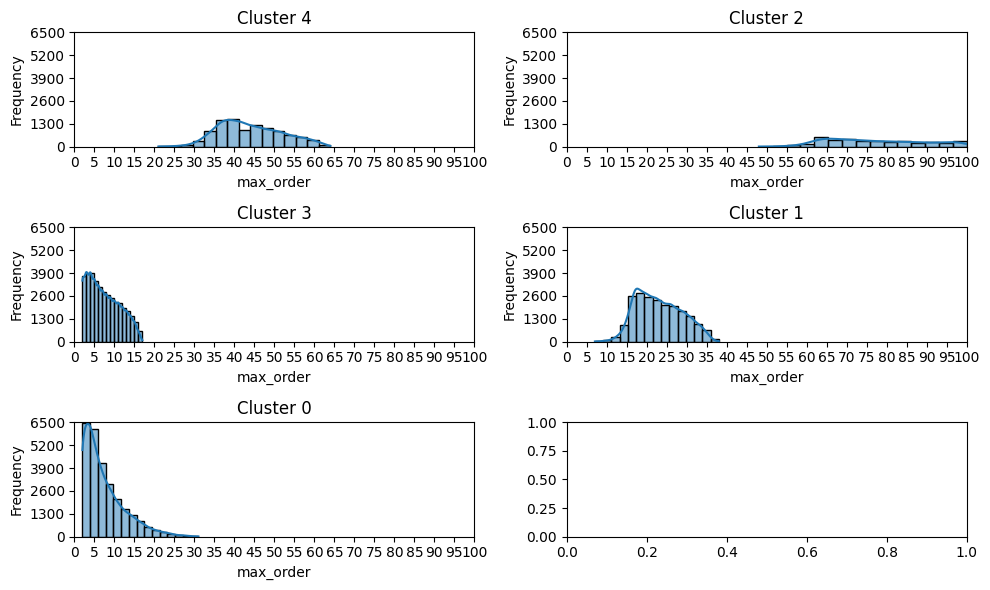

In [40]:
clusters = df_l5['Clusters_5'].unique()
n_clusters = len(clusters)

n_cols = 2
n_rows = math.ceil(n_clusters / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(10, 6))

max_freq = 0
for cluster in clusters:
    freq, _ = np.histogram(df_l5[df_l5['Clusters_5'] == cluster]['max_order'], bins=15)
    max_freq = max(max_freq, freq.max())

round_up_to_y = 100 
max_freq_rounded = math.ceil(max_freq / round_up_to_y) * round_up_to_y

min_x = df_l5['max_order'].min()
max_x = df_l5['max_order'].max()

round_up_to_x = 5
min_x_rounded = math.floor(min_x / round_up_to_x) * round_up_to_x
max_x_rounded = math.ceil(max_x / round_up_to_x) * round_up_to_x

for i, cluster in enumerate(clusters):
    row = i // n_cols
    col = i % n_cols
    sns.histplot(
        df_l5[df_l5['Clusters_5'] == cluster]['max_order'],
        kde=True, bins=15, ax=axes[row, col]
    )
    axes[row, col].set_title(f'Cluster {cluster}')
    axes[row, col].set_xlabel('max_order')
    axes[row, col].set_ylabel('Frequency')
    
    axes[row, col].set_ylim(0, max_freq_rounded)
       
    axes[row, col].set_xlim(min_x_rounded, max_x_rounded)
      
    axes[row, col].yaxis.set_ticks(range(0, max_freq_rounded + 1, max_freq_rounded // 5))
        
    axes[row, col].xaxis.set_ticks(range(min_x_rounded, max_x_rounded + 1, round_up_to_x))

plt.tight_layout()
plt.show()


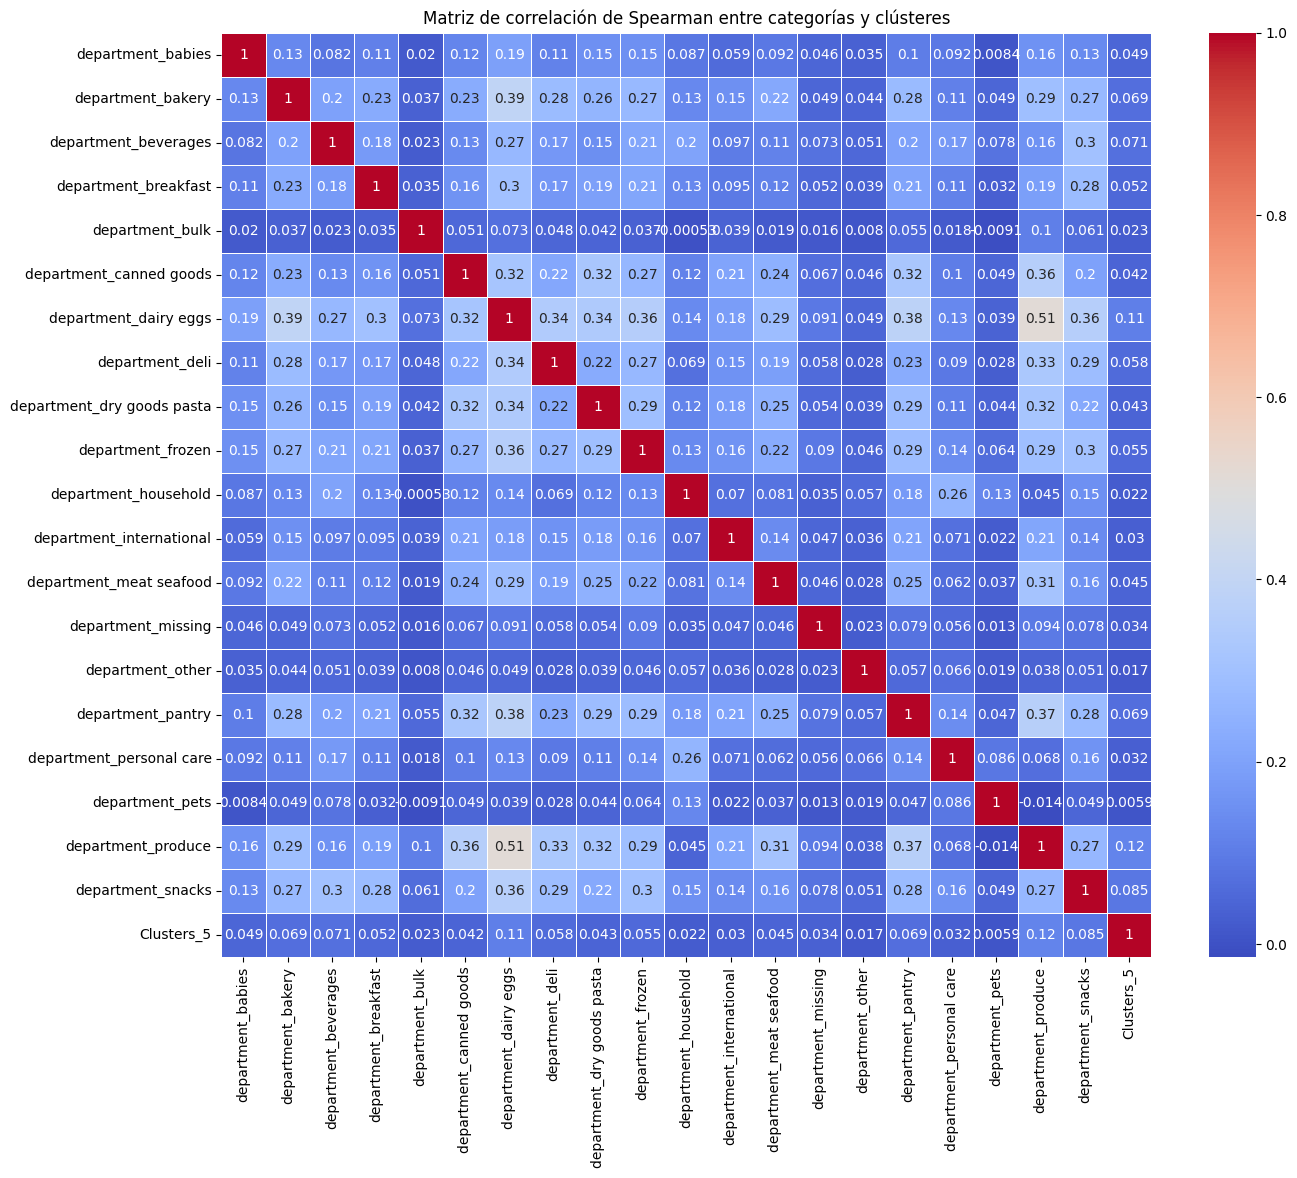

In [41]:
correlations = df_l5[department_columns + ['Clusters_5']].corr(method='spearman')

plt.figure(figsize=(15, 12))
sns.heatmap(correlations, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de correlación de Spearman entre categorías y clústeres')
plt.show()

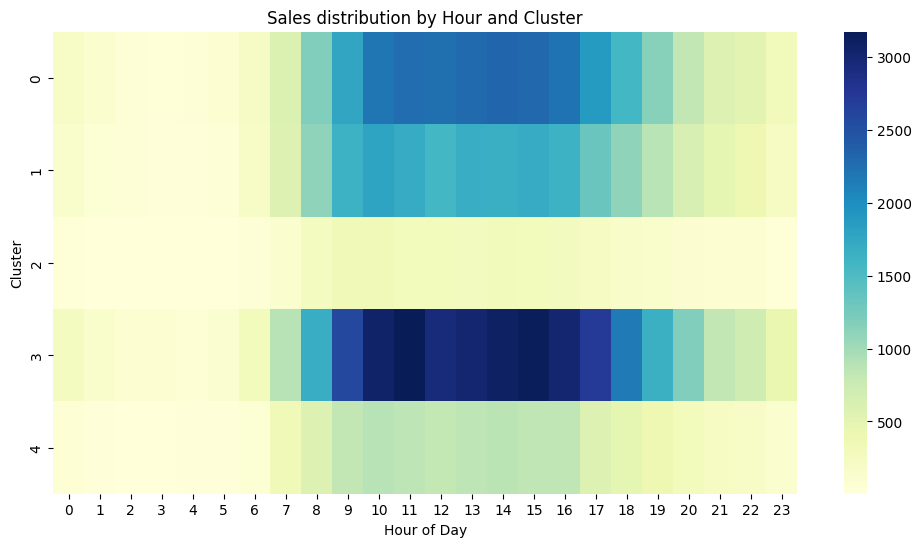

In [42]:
order_hour_counts = df_l5.groupby(['Clusters_5', 'order_hour_of_day']).size().unstack()

plt.figure(figsize=(12, 6))
sns.heatmap(order_hour_counts, cmap='YlGnBu', annot=False)
plt.title('Sales distribution by Hour and Cluster')
plt.xlabel('Hour of Day')
plt.ylabel('Cluster')
plt.show()

Si bien la clusterización utilizando 5 clusters muestra buenos resultados, se detecta que algunos clusters presentan características muy similares entre sí.
#### 1. Separación Visual de Clusters
Diferenciación clara en varios departamentos: se ve como los clústeres tienen proporciones significativamente distintas en departamentos clave como Produce, Snacks, y Dairy eggs, lo que indica una segmentación efectiva en las preferencias de compra.
Superposición limitada en algunos departamentos: algunos departamentos como Household y Bakery tienen proporciones más homogéneas entre clústeres, lo que sugiere que no son tan relevantes para diferenciar grupos.

#### 2. Distribución de Variables por Cluster
Las distribuciones de variables como **days_since_prior_order** y **max_order** comienzan a tener comportamientos similares intracluster:
     
**days_since_prior_order:** Clusters 1 y 3: Compras frecuentes (4-7 días) con variaciones menores; representan clientes regulares.

**max_order:** 

- Clusters 1 y 3: Altos historiales (Cluster 1: 40-50 órdenes, Cluster 3: 60-90 órdenes), indicando clientes leales y activos. 
- Clusters 2 y 4: Historial intermedio (Cluster 2: 25-30 órdenes, 
- Cluster 4: 5-20 órdenes), reflejando consumidores en crecimiento o con actividad moderada.

#### Conclusión
La clusterización de 5 clústeres logra diferenciar bien algunos grupos específicos, pero no todos los clústeres están completamente separados debido a la superposición observada en ciertos departamentos y variables.

### Clustering - K-Means - n=5 with Input Reduction

In [43]:
X_red = df[['max_order', 'order_hour_of_day', 'days_since_prior_order', 'reordered']]

X_input = X_red.values

kmeans5_1 = KMeans(n_clusters=5, random_state=100)
kmeans5_1.fit(X_input)

predictions = kmeans5_1.predict(X_input)

counts = np.bincount(predictions, minlength=5).reshape(1, 5)

countscldf = pd.DataFrame(counts, columns=["Cluster 0", "Cluster 1", "Cluster 2", "Cluster 3", "Cluster 4"])
print(countscldf)

c:\Users\marti\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


   Cluster 0  Cluster 1  Cluster 2  Cluster 3  Cluster 4
0      37973       9942      20273      27083       3647


In [44]:
pca = PCA(n_components=2, random_state=453)
X_pca = pca.fit_transform(X_input)

print('Explained variance ratio (first two components):', pca.explained_variance_ratio_)

Explained variance ratio (first two components): [0.77659628 0.18112181]


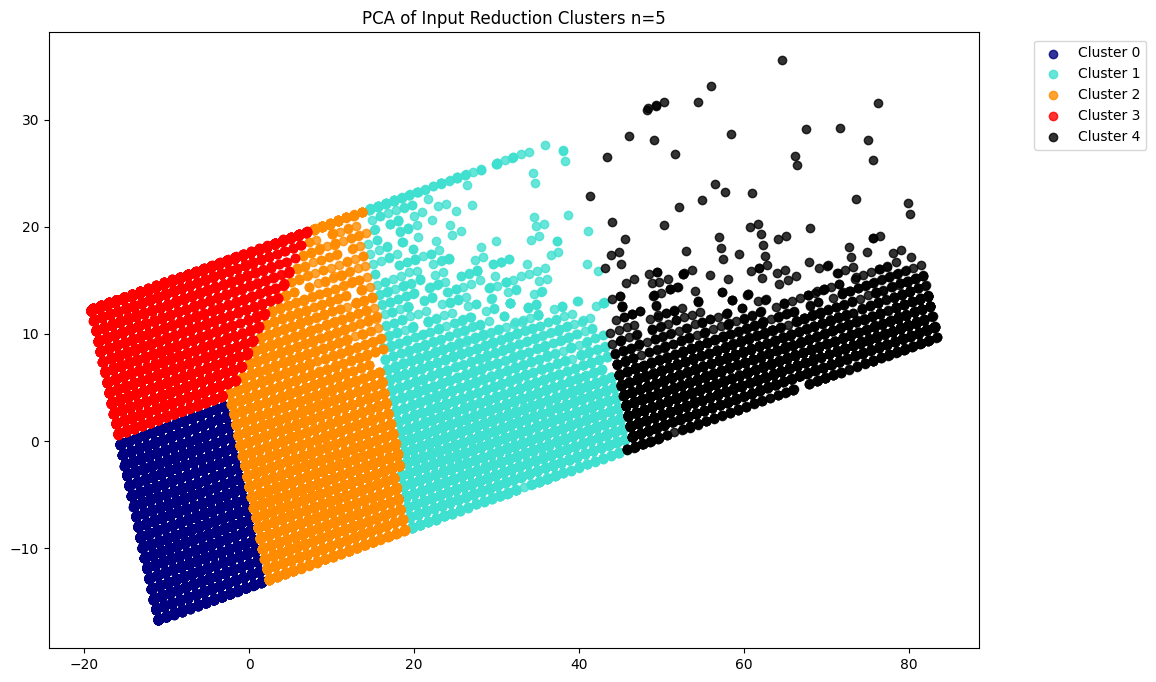

In [45]:
plt.figure(figsize=(12, 8))
colors = ['navy', 'turquoise', 'darkorange', 'red', 'black']
target_names = ["Cluster 0", "Cluster 1", "Cluster 2", "Cluster 3", "Cluster 4"]

for color, cluster_idx, target_name in zip(colors, range(5), target_names):
    plt.scatter(
        X_pca[predictions == cluster_idx, 0], 
        X_pca[predictions == cluster_idx, 1], 
        color=color, alpha=0.8, label=target_name
    )

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.6)
plt.title('PCA of Input Reduction Clusters n=5')
plt.show()

In [46]:
centroids_pca = pca.transform(centroids_k5)

distances = []
for i, centroid in enumerate(centroids_pca):
    cluster_distances = np.linalg.norm(X_pca - centroid, axis=1)
    distances.append(cluster_distances)

distances_df = pd.DataFrame(distances).T
distances_df.columns = [f'Distance_to_Cluster_{i}' for i in range(len(centroids_pca))]

distances_df['Assigned_Cluster'] = kmeans5_1.labels_
distances_df['Min_Distance'] = distances_df.apply(
    lambda row: row[f"Distance_to_Cluster_{int(row.Assigned_Cluster)}"], axis=1
)

summary = distances_df.groupby('Assigned_Cluster')['Min_Distance'].describe()
print(summary)

plt.figure(figsize=(10, 6))
sns.boxplot(x='Assigned_Cluster', y='Min_Distance', data=distances_df)
plt.title('Distribución de distancias a los centroides por cluster')
plt.xlabel('Cluster')
plt.ylabel('Distancia mínima al centroide')
plt.show()



NameError: name 'centroids_k5' is not defined

#### Distribución de Distancias a los Centroides por Cluster

- Las distancias mínimas por cluster reflejan una adecuada asignación de los datos a los centroides. Las medianas oscilan entre 5.3 y 10.4 unidades, esto indica que existe buena proximidad en la mayoría de los clusters.

- Si bien se observan algunos outliers en los clusters, estos son relativamente esperables dada la naturaleza de los datos y se considera que no comprometen de manera relevante la efectividad del modelo.

##### Análisis por Cluster:

- Cluster 0: Presenta una mediana baja (5.52) y poca dispersión, esto sugiere una agrupación compacta y homogénea.
- Cluster 1: Tiene una mediana de 7.27, con una dispersión elevada. De todas formas se considera que el bocplot sigue razonablemente compacto.
- Cluster 2: Posee una mediana de 6.60 con dispersión moderada. Su comportamiento sugiere estabilidad dentro del grupo.
- Cluster 3: Con una mediana de 5.33, tiene una baja dispersión y pocos outliers, existe buena cohesión dentro de este cluster.
- Cluster 4: Este cluster presenta una mediana de 10.42 y la mayor dispersión entre todos los clusters. Esto podría implicar que el grupo es más heterogéneo.


Conclusión
En general, los clusters presentan una baja dispersión y proximidad adecuada a sus centroides, esto respalda que el modelo de clusterización es efectivo con 𝑘=5. Aunque el Cluster 4 presenta mayor heterogeneidad, su comportamiento está dentro de los resultados esperados y no compromete significativamente la calidad del modelo.

Se complementará este análisis con métricas adicionales como el Silhouette Score, el Calinski-Harabasz Index y el Dunn Index para confirmar la calidad y la separación de los clusters en el espacio de características.

In [ ]:
silhouette = silhouette_score(X_pca, predictions)
print(f"Silhouette Score: {silhouette:.4f}")

calinski_harabasz = calinski_harabasz_score(X_pca, predictions)
print(f"Calinski-Harabasz Index: {calinski_harabasz:.4f}")

def dunn_index(X, labels):
    unique_clusters = np.unique(labels)
    cluster_distances = []
    intra_cluster_distances = []
    
    for i in range(len(unique_clusters)):
        for j in range(i + 1, len(unique_clusters)):
            points_i = X[labels == unique_clusters[i]]
            points_j = X[labels == unique_clusters[j]]
            dist = np.min(cdist(points_i, points_j))
            cluster_distances.append(dist)
    
    for cluster in unique_clusters:
        points_in_cluster = X[labels == cluster]
        dist = np.max(cdist(points_in_cluster, points_in_cluster))
        intra_cluster_distances.append(dist)
    
    return np.min(cluster_distances) / np.max(intra_cluster_distances)

labels_np = np.array(predictions)

dunn = dunn_index(X_pca, labels_np)
print(f"Dunn Index: {dunn:.4f}")


Silhouette Score: 0.4889
Calinski-Harabasz Index: 177617.4346
Dunn Index: 0.0003


#### Interpretación de las Métricas de Clusterización

##### 1. Silhouette Score
Valor: 0.4889
Este valor se encuentra cerca del límite de 0.5, lo que sugiere que la separación entre clusters es moderada, pero aún puede existir cierto solapamiento entre ellos.

##### 2. Calinski-Harabasz Index
Valor: 177617.4346
Un valor alto, esto indica que los clusters son densos internamente y están bien separados en relación con la magnitud de los datos analizados.

##### 3. Dunn Index
Valor: 0.0003
Arroja un valor muy bajo, lo cual refleja que la separación entre clusters es insuficiente y que los puntos dentro de los clusters están relativamente dispersos.

##### Conclusión
El Silhouette Score indica una moderada separación entre clusters y el Calinski-Harabasz Index muestra un mejor rendimiento que en la clusterización de 4 clusters, un punto negativo a considerar es que el Dunn Index es bajo, lo que sugiere que los clusters podrían diferenciarse más entre sí.

In [ ]:
df_l5 = df[['user_id','department_babies', 'department_bakery', 'department_beverages', 'department_breakfast', 'department_bulk', 
        'department_canned goods', 'department_dairy eggs', 'department_deli', 
        'department_dry goods pasta', 'department_frozen', 'department_household', 
        'department_international', 'department_meat seafood', 'department_missing', 
        'department_other', 'department_pantry', 'department_personal care', 
        'department_pets', 'department_produce', 'department_snacks', 'max_order', 'order_hour_of_day', 'days_since_prior_order']]

In [66]:
kmeans_5_pca = KMeans(n_clusters=5, random_state=100)
kmeans_5_pca.fit(X_pca)

df_l5['Clusters_5_1_PCA'] = kmeans_5_pca.labels_

c:\Users\marti\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\marti\AppData\Local\Temp\ipykernel_15412\4022993968.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_l5['Clusters_5_1_PCA'] = kmeans_5_pca.labels_


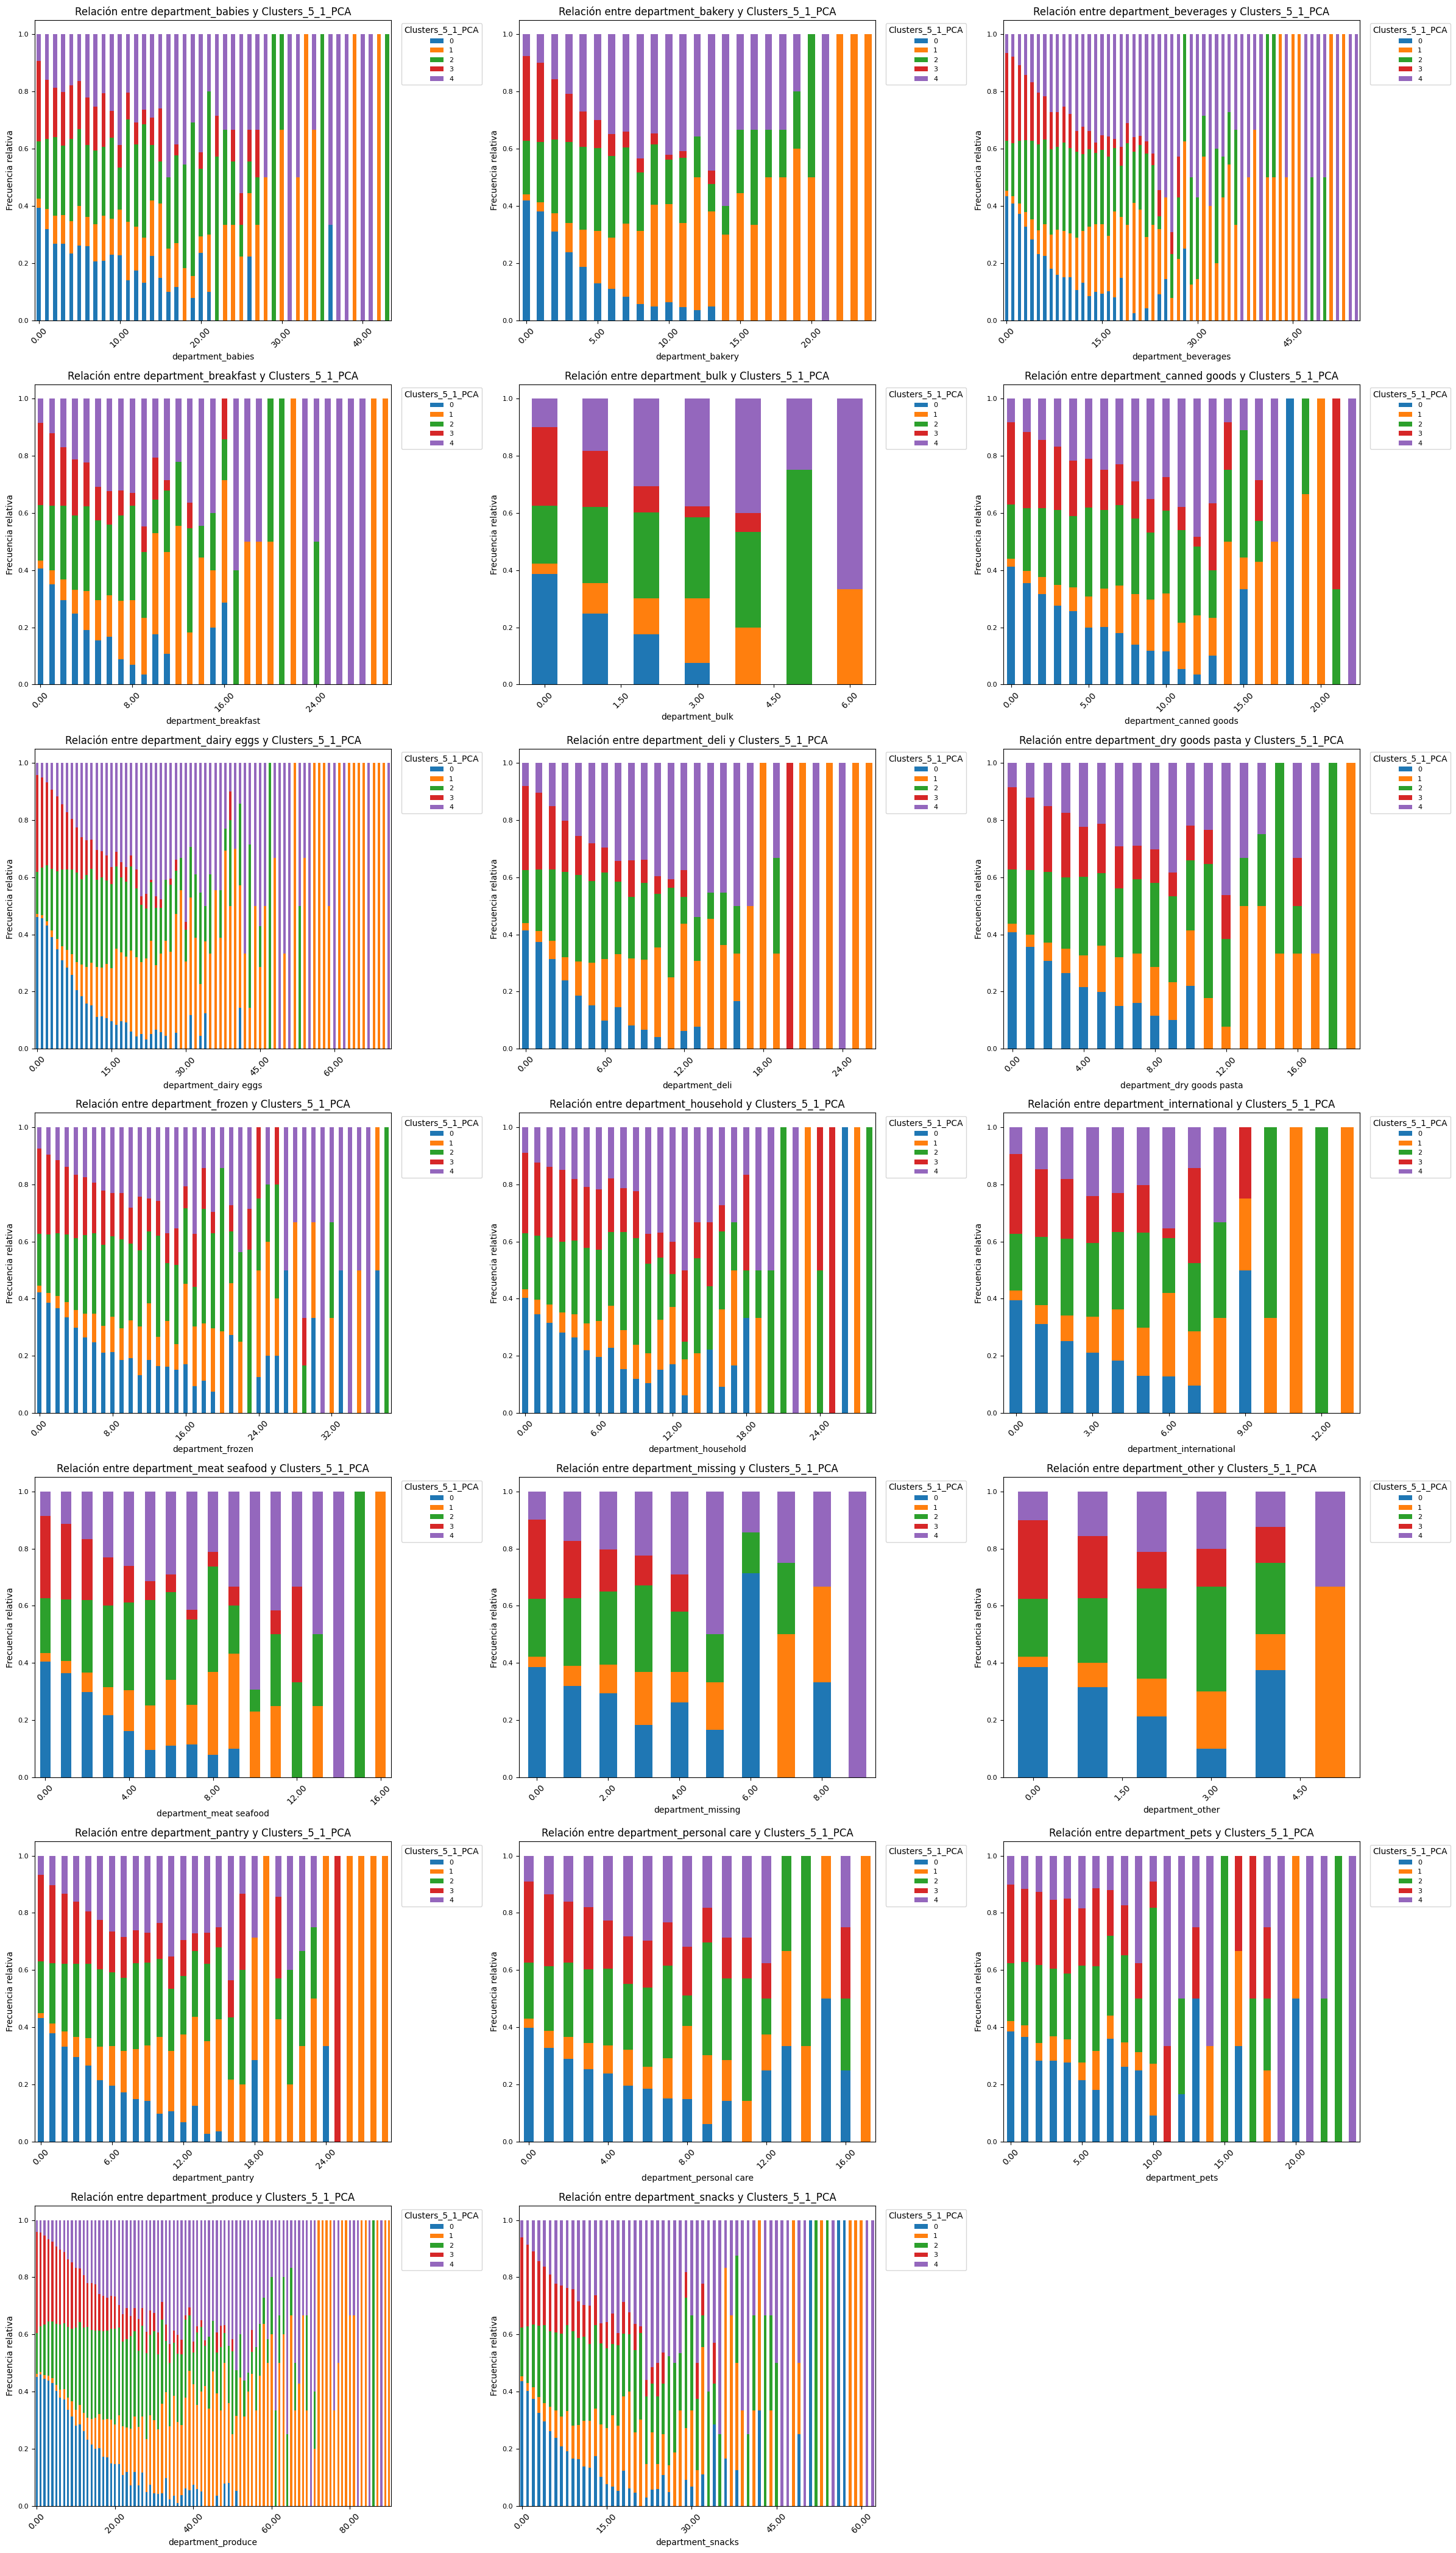

In [67]:
department_columns = [col for col in df.columns if col.startswith('department')]

num_rows = 7
num_cols = 3

fig, axs = plt.subplots(num_rows, num_cols, figsize=(8 * num_cols, 6 * num_rows))

for i, columna in enumerate(department_columns):
    if i >= num_rows * num_cols:
        break
    
    row = i // num_cols
    col = i % num_cols

    frecuencias = df_l5.groupby(columna)['Clusters_5_1_PCA'].value_counts(normalize=True).unstack()
    frecuencias.plot(kind='bar', stacked=True, ax=axs[row, col])
    
    axs[row, col].set_title(f'Relación entre {columna} y Clusters_5_1_PCA', fontsize=12)
    axs[row, col].set_xlabel(columna, fontsize=10)
    axs[row, col].set_ylabel('Frecuencia relativa', fontsize=10)
    axs[row, col].tick_params(axis='x', rotation=45, labelsize=10)
    axs[row, col].tick_params(axis='y', labelsize=8)

    axs[row, col].legend(title='Clusters_5_1_PCA', fontsize=8, bbox_to_anchor=(1.02, 1), loc='upper left')
    
    axs[row, col].xaxis.set_major_locator(ticker.MaxNLocator(5))
    axs[row, col].xaxis.set_major_formatter(ticker.FormatStrFormatter('%.2f'))

for j in range(i + 1, num_rows * num_cols):
    fig.delaxes(axs[j // num_cols, j % num_cols])

plt.tight_layout()
plt.show()

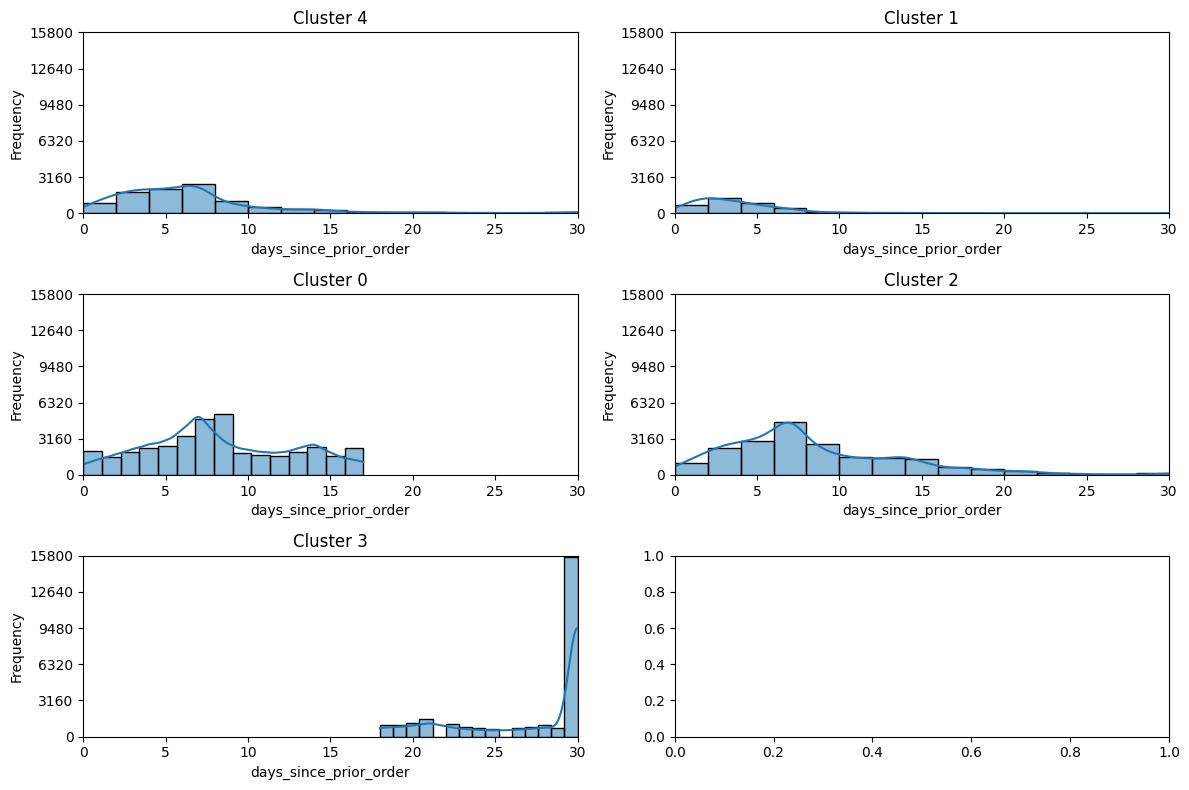

In [ ]:
clusters = df_l5['Clusters_5_1_PCA'].unique()
n_clusters = len(clusters)

n_cols = 2
n_rows = math.ceil(n_clusters / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 8))

max_freq = 0
for cluster in clusters:
    freq, _ = np.histogram(df_l5[df_l5['Clusters_5_1_PCA'] == cluster]['days_since_prior_order'], bins=15)
    max_freq = max(max_freq, freq.max())

round_up_to_y = 100 
max_freq_rounded = math.ceil(max_freq / round_up_to_y) * round_up_to_y

min_x = df['days_since_prior_order'].min()
max_x = df['days_since_prior_order'].max()

round_up_to_x = 5
min_x_rounded = math.floor(min_x / round_up_to_x) * round_up_to_x
max_x_rounded = math.ceil(max_x / round_up_to_x) * round_up_to_x

for i, cluster in enumerate(clusters):
    row = i // n_cols
    col = i % n_cols
    sns.histplot(
        df_l5[df_l5['Clusters_5_1_PCA'] == cluster]['days_since_prior_order'],
        kde=True, bins=15, ax=axes[row, col]
    )
    axes[row, col].set_title(f'Cluster {cluster}')
    axes[row, col].set_xlabel('days_since_prior_order')
    axes[row, col].set_ylabel('Frequency')
    
    axes[row, col].set_ylim(0, max_freq_rounded)
       
    axes[row, col].set_xlim(min_x_rounded, max_x_rounded)
      
    axes[row, col].yaxis.set_ticks(range(0, max_freq_rounded + 1, max_freq_rounded // 5))
        
    axes[row, col].xaxis.set_ticks(range(min_x_rounded, max_x_rounded + 1, round_up_to_x))

plt.tight_layout()
plt.show()

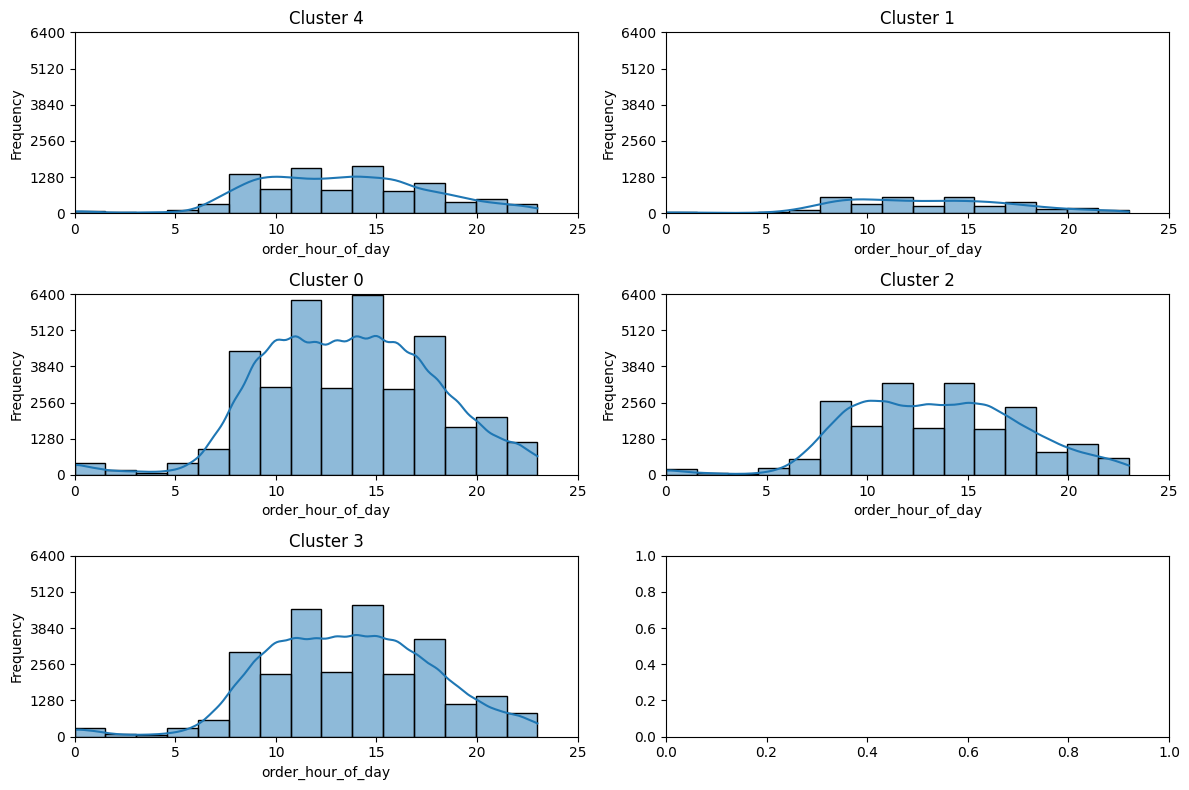

In [ ]:
clusters = df_l5['Clusters_5_1_PCA'].unique()
n_clusters = len(clusters)

n_cols = 2
n_rows = math.ceil(n_clusters / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 8))

max_freq = 0
for cluster in clusters:
    freq, _ = np.histogram(df_l5[df_l5['Clusters_5_1_PCA'] == cluster]['order_hour_of_day'], bins=15)
    max_freq = max(max_freq, freq.max())

round_up_to_y = 100 
max_freq_rounded = math.ceil(max_freq / round_up_to_y) * round_up_to_y

min_x = df_l5['order_hour_of_day'].min()
max_x = df_l5['order_hour_of_day'].max()

round_up_to_x = 5
min_x_rounded = math.floor(min_x / round_up_to_x) * round_up_to_x
max_x_rounded = math.ceil(max_x / round_up_to_x) * round_up_to_x

for i, cluster in enumerate(clusters):
    row = i // n_cols
    col = i % n_cols
    sns.histplot(
        df_l5[df_l5['Clusters_5_1_PCA'] == cluster]['order_hour_of_day'],
        kde=True, bins=15, ax=axes[row, col]
    )
    axes[row, col].set_title(f'Cluster {cluster}')
    axes[row, col].set_xlabel('order_hour_of_day')
    axes[row, col].set_ylabel('Frequency')
    
    axes[row, col].set_ylim(0, max_freq_rounded)
       
    axes[row, col].set_xlim(min_x_rounded, max_x_rounded)
      
    axes[row, col].yaxis.set_ticks(range(0, max_freq_rounded + 1, max_freq_rounded // 5))
        
    axes[row, col].xaxis.set_ticks(range(min_x_rounded, max_x_rounded + 1, round_up_to_x))

plt.tight_layout()
plt.show()

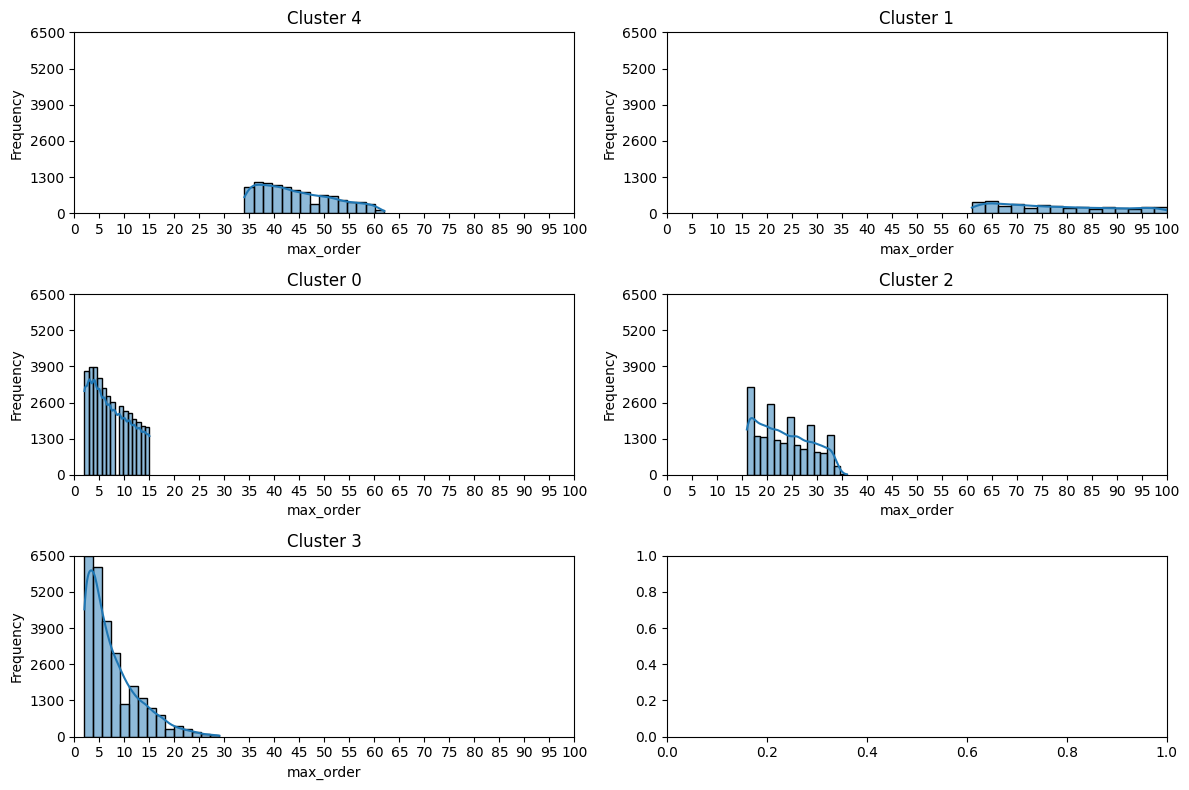

In [72]:
clusters = df_l5['Clusters_5_1_PCA'].unique()
n_clusters = len(clusters)

n_cols = 2
n_rows = math.ceil(n_clusters / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 8))

max_freq = 0
for cluster in clusters:
    freq, _ = np.histogram(df_l5[df_l5['Clusters_5_1_PCA'] == cluster]['max_order'], bins=15)
    max_freq = max(max_freq, freq.max())

round_up_to_y = 100 
max_freq_rounded = math.ceil(max_freq / round_up_to_y) * round_up_to_y

min_x = df['max_order'].min()
max_x = df['max_order'].max()

round_up_to_x = 5
min_x_rounded = math.floor(min_x / round_up_to_x) * round_up_to_x
max_x_rounded = math.ceil(max_x / round_up_to_x) * round_up_to_x

for i, cluster in enumerate(clusters):
    row = i // n_cols
    col = i % n_cols
    sns.histplot(
        df_l5[df_l5['Clusters_5_1_PCA'] == cluster]['max_order'],
        kde=True, bins=15, ax=axes[row, col]
    )
    axes[row, col].set_title(f'Cluster {cluster}')
    axes[row, col].set_xlabel('max_order')
    axes[row, col].set_ylabel('Frequency')
    
    axes[row, col].set_ylim(0, max_freq_rounded)
       
    axes[row, col].set_xlim(min_x_rounded, max_x_rounded)
      
    axes[row, col].yaxis.set_ticks(range(0, max_freq_rounded + 1, max_freq_rounded // 5))
        
    axes[row, col].xaxis.set_ticks(range(min_x_rounded, max_x_rounded + 1, round_up_to_x))

plt.tight_layout()
plt.show()

#### Interpretación de Clusterización Kmeans con PCA (5 CLusters)

##### Cluster 0: "Compradores Nuevos o Infrecuentes"

- Tipo de consumidor asociado: Este grupo está compuesto por consumidores que tienen un bajo historial de compras, con un máximo de 15 órdenes acumuladas. Su comportamiento sugiere que pueden ser nuevos clientes o compradores esporádicos. Tienden a realizar compras pequeñas y específicas, posiblemente enfocadas en productos básicos o de prueba..

- Distribución de max_order: Clientes con órdenes limitadas, que no superan las 15 compras acumuladas. Este patrón sugiere que son nuevos clientes o compradores ocasionales.
- Distribución de days_since_prior_order: Clientes con frecuencia de compra regular, situados entre 5 y 15 días, este comportamiento confirma la teoria de que se trate de clientes nuevos.
- Relación con departamentos: En general suelen comprar pocas cantidades, teniendo sus preferncias en departamentos como: produce, bakery y dairy eggs.


#### Cluster 1: "Compradores Leales"

- Tipo de consumidor asociado: Comprador habitual y recurrente. Este perfil de consumidores muestran compromiso elevado con la tienda, posiblemente se trata de familias con alto ritmo de consumo.

- Distribución de max_order: Clientes con un historial consistente de compras.
- Distribución de days_since_prior_order: Alta frecuencia de compras con intervalos cortos (0-10 días).
- Relación con departamentos: tienen predominancia en departamentos como Breakfast y Babbies, esto da la pauta de que se trate de familias que realizan compras para el hogar.

##### Cluster 2: “Comprador Ocasional Que Realiza Compras Diversificadas”

- Tipo de consumidor asociado: Estos usuarios realizan compras ocasionalmente y a su vez, las mismas son diversificadas. Este grupo puede representar a estudiantes y adultos jóvenes. 

- Distribución de max_order: Clientes que realizan compras de volumen intermedio, tendiendo a moderadamente alto.
- Distribución de days_since_prior_order: Intervalos de compra con mayor frecuencia entre una y dos semanas.
- Relación con departamentos: Las compras están balanceadas entre productos esenciales y no esenciales, con preferencia hacia los snacks y productos empaquetados.


#### Cluster 3: "Compradores Mensuales"

- Tipo de consumidor asociado: Comprador que realiza compras mensuales planificadas. Este perfil podría incluir personas que organizan compras grandes y regulares una vez al mes.

- Distribución de max_order: Clientes con un historial bajo de órdenes acumuladas, lo que sugiere menor frecuencia de compra en comparación con otros clusters.
- Distribución de days_since_prior_order: Intervalos de compra largos, predominantemente cercanos a los 30 días, lo que refuerza el patrón de compras mensuales.
- Relación con departamentos: Muestra mayor interes por categorias como pets, pantry y canned goods.


#### Cluster 4: "Consumidor Recurrente y Especializado"

- Tipo de consumidor asociado: Los datos sugieren que este perfil corresponde a consumidores que realizan compras frecuentes y de gran volumen, posiblemente para fines comerciales o de reposición.

- Distribución de max_order:  Historial de compras elevado, comunmente de gran valor. Tendencia a realizar pedidos de mayor volumen, afin con la hipotesis de negocios o consumidores con necesidades recurrentes.
- Distribución de days_since_prior_order:  Frecuencia muy alta con intervalos muy cortos. Sugiere urgencia o demanda constante en el reabastecimiento.
- Relación con departamentos: Predominancia en categorías de alta rotación como productos empaquetados, frescos, y bienes esenciales. Refleja un enfoque en productos necesarios para operaciones diarias o inventarios rápidos.


#### **Generación de DataSet para modelo de recomendación**

In [75]:
df_recommendationsystem = df_l5

In [76]:
cluster_mapping = {
    2: "Comprador ocasional que realiza compras diversificadas",
    3: "Compradores Mensuales",
    1: "Compradores Leales",
    0: "Compradores Nuevos o Infrecuentes",
    4: "Consumidor recurrente y especializado"
}

df_recommendationsystem['Customer_Type'] = df_recommendationsystem['Clusters_5'].map(cluster_mapping)

C:\Users\marti\AppData\Local\Temp\ipykernel_15412\1545777863.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_recommendationsystem['Customer_Type'] = df_recommendationsystem['Clusters_5'].map(cluster_mapping)


In [77]:
df_recommendationsystem.head()

department_babies  department_bakery  department_beverages  \
0                  0                  1                     1   
1                  0                  3                     4   
2                  0                  0                     1   
3                  0                  0                     2   
4                  2                  0                     3   

   department_breakfast  department_bulk  department_canned goods  \
0                     2                0                        2   
1                     0                0                        0   
2                     0                0                        0   
3                     0                0                        0   
4                     1                0                        0   

   department_dairy eggs  department_deli  department_dry goods pasta  \
0                     31                7                           3   
1                      6                1                           4   
2                      6                0                           0   
3                      1                0                           0   
4                      4                0                           0   

   department_frozen  ...  department_personal care  department_pets  \
0                  5  ...                         1                0   
1                  0  ...                         0                0   
2                  0  ...                         0                0   
3                  0  ...                         0                0   
4                  0  ...                         9                0   

   department_produce  department_snacks  max_order  order_hour_of_day  \
0                  18                  4         38                 16   
1                  24                  5         90                 11   
2                   3                  0          3                 11   
3                   3                  1         18                 17   
4                   5                  2          8                  1   

   days_since_prior_order  Clusters_5  \
0                     3.0           4   
1                     3.0           2   
2                     6.0           3   
3                     7.0           1   
4                    30.0           0   

                                       Customer_Type  Clusters_5_1_PCA  
0              Consumidor recurrente y especializado                 4  
1  Comprador ocasional que realiza compras divers...                 1  
2                              Compradores Mensuales                 0  
3                                 Compradores Leales                 2  
4                  Compradores Nuevos o Infrecuentes                 3  

[5 rows x 26 columns]

In [78]:
df_recommendationsystem.drop(columns='days_since_prior_order', inplace=True)

C:\Users\marti\AppData\Local\Temp\ipykernel_15412\3287733938.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_recommendationsystem.drop(columns='days_since_prior_order', inplace=True)


In [79]:
df_recommendationsystem.drop(columns='order_hour_of_day', inplace=True)


C:\Users\marti\AppData\Local\Temp\ipykernel_15412\78267482.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_recommendationsystem.drop(columns='order_hour_of_day', inplace=True)


In [80]:
df_recommendationsystem.to_csv('../00_Data_Bases/df_recommendationsystem.csv', index=False)

zip_filename = '../00_Data_Bases/df_recommendationsystem.zip'
csv_filename = '../00_Data_Bases/df_recommendationsystem.csv'

with zipfile.ZipFile(zip_filename, 'w', compression=zipfile.ZIP_DEFLATED) as zipf:
    zipf.write(csv_filename, arcname='df_recommendationsystem.csv')